# Setting up environment


In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/MyDrive
%mkdir Technical_Test_Vucar__
%cd Technical_Test_Vucar__
%mkdir -p dataset
%mkdir -p models
%cd dataset
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=14-oWkLU--L3_9ZdlWDgEj4pnUg8ovE9s' -O car.csv
%cd ..

Mounted at /content/drive/
/content/drive/MyDrive
mkdir: cannot create directory ‘Technical_Test_Vucar__’: File exists
/content/drive/MyDrive/Technical_Test_Vucar__
/content/drive/MyDrive/Technical_Test_Vucar__/dataset
--2025-01-10 09:14:57--  https://docs.google.com/uc?export=download&id=14-oWkLU--L3_9ZdlWDgEj4pnUg8ovE9s
Resolving docs.google.com (docs.google.com)... 108.177.97.138, 108.177.97.139, 108.177.97.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=14-oWkLU--L3_9ZdlWDgEj4pnUg8ovE9s&export=download [following]
--2025-01-10 09:14:58--  https://drive.usercontent.google.com/download?id=14-oWkLU--L3_9ZdlWDgEj4pnUg8ovE9s&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.97

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
from sklearn.impute import SimpleImputer

# Data preprocessing

## Load dataset

In [3]:
file_path = 'dataset/car.csv'
data = pd.read_csv(file_path)
data

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
0,148468232,108616925,1693378633111,1980,Jeep,A2,Mỹ,SUV / Cross over,4.0,MT,petrol,green,40000,380000000.0,used
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
4,149530234,109517456,1693313503000,2001,Fiat,Siena,NaN,NaN,NaN,MT,petrol,white,200000,73000000.0,used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317631,148874300,108958993,1696836032000,2007,Hyundai,Veracruz,Hàn Quốc,SUV / Cross over,7.0,AT,oil,NaN,110000,535000000.0,used
317632,150398284,110264477,1695692918000,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used
317633,150748445,110565749,1696580444000,2004,Ssangyong,Musso,Hàn Quốc,SUV / Cross over,7.0,MT,petrol,white,20000,95000000.0,used
317634,150811050,110619804,1696753826000,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used


## Eliminate brands not representing 90% of total cars

In [4]:
brand_counts = data['brand'].value_counts()
total_brands = brand_counts.sum()

brand_counts_cumsum = brand_counts.cumsum()
brand_percent = brand_counts_cumsum / total_brands

brands_top_90 = brand_percent[brand_percent <= 0.9].index

filtered_data = data[data['brand'].isin(brands_top_90)]
filtered_data

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
5,148583720,108712558,1694932494416,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used
6,150061598,109974620,1694955795249,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317630,150811050,110619804,1696753826000,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used
317631,148874300,108958993,1696836032000,2007,Hyundai,Veracruz,Hàn Quốc,SUV / Cross over,7.0,AT,oil,NaN,110000,535000000.0,used
317632,150398284,110264477,1695692918000,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used
317634,150811050,110619804,1696753826000,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used


## Eliminate new cars

In [5]:

filtered_data = filtered_data[filtered_data['condition'] != 'new']
filtered_data

,id,list_id,list_time,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
1,149864917,109805135,1694308247000,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,149580046,109560282,1693462201000,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,148601679,108727914,1693493126176,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
5,148583720,108712558,1694932494416,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used
6,150061598,109974620,1694955795249,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317630,150811050,110619804,1696753826000,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used
317631,148874300,108958993,1696836032000,2007,Hyundai,Veracruz,Hàn Quốc,SUV / Cross over,7.0,AT,oil,NaN,110000,535000000.0,used
317632,150398284,110264477,1695692918000,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used
317634,150811050,110619804,1696753826000,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used


## Dataset overview and initial exploration

### Check for missing values

In [6]:
def check_missing_values(data):
  missing_values = data.isnull().sum()
  return missing_values[missing_values > 0]

In [7]:
filtered_nan = check_missing_values(filtered_data)
filtered_nan

,0
origin,74546
type,31729
seats,27996
gearbox,1371
fuel,44
color,73574
price,28


In [8]:
list_features = [
    'manufacture_date',
    'brand',
    'model',
    'origin',
    'type',
    'seats',
    'gearbox',
    'fuel',
    'color',
    'mileage_v2',
    'price',
    'condition'
]
filtered_data = filtered_data[list_features]
filtered_data

,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
1,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
2,2016,Kia,Rio,Hàn Quốc,NaN,NaN,AT,petrol,NaN,78545,295000000.0,used
3,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
5,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used
6,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used
...,...,...,...,...,...,...,...,...,...,...,...,...
317630,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used
317631,2007,Hyundai,Veracruz,Hàn Quốc,SUV / Cross over,7.0,AT,oil,NaN,110000,535000000.0,used
317632,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used
317634,2015,Kia,K3,NaN,Sedan,5.0,AT,petrol,white,1234,370000000.0,used


In [9]:
drop_na_filtered_data = filtered_data.dropna()
drop_na_filtered_data

,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
1,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
3,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
5,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used
6,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used
7,2020,Mitsubishi,Xpander,Nước khác,Minivan (MPV),7.0,MT,petrol,white,50000,465000000.0,used
...,...,...,...,...,...,...,...,...,...,...,...,...
317623,2018,Hyundai,Grand i10,Việt Nam,Hatchback,5.0,AT,petrol,red,87000,305000000.0,used
317626,2018,Hyundai,Grand i10,Việt Nam,Hatchback,5.0,AT,petrol,red,87000,305000000.0,used
317629,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used
317632,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used


In [10]:
categorical_features = [
    'brand',
    'model',
    'origin',
    'type',
    'gearbox',
    'fuel',
    'color',
    'condition'
]
numerical_features = [
    'manufacture_date',
    'seats',
    'mileage_v2',
    'price'
]
nan_features = [
    'origin',
    'type',
    'seats',
    'gearbox',
    'fuel',
    'color',
    'price'
]
categorical_with_nan = list(set(categorical_features) & set(nan_features))
numerical_with_nan = list(set(numerical_features) & set(nan_features))
print(categorical_with_nan)
print(numerical_with_nan)

['fuel', 'origin', 'gearbox', 'type', 'color']
['price', 'seats']


- 5 categorical features contain NaN values: `origin`, `color`, `fuel`, `gearbox`, `type`.  
- 2 numerical features contain NaN values: `price` and `seats`.  
  - `price` will be the target variable for the model, so it will be ignored for imputation.  
  - Only `seats` requires imputation among numerical features.  



### Handle missing values

#### Version 1: Only drop NaN

In [11]:
data_cleaned_version1 = filtered_data.dropna()

#### Version 2: Applying imputation (most frequency) and then drop NaN

In [12]:
# Define the columns that are missing values
missing_columns = ['origin', 'type', 'seats', 'gearbox', 'color']

# Identify columns to group by (those that may provide useful information)
group_by_columns = ['brand', 'model', 'fuel', 'mileage_v2', 'condition']

# Apply imputation based on the groups (mean for numeric, most_frequent for categorical)
for col in missing_columns:
    if col in ['seats']:  # Numeric columns
        # Use the mean of the group to fill missing values
        imputer = SimpleImputer(strategy='mean')

        # Define a function that applies imputation only when there are non-NaN values in the group
        def impute_group(group):
            if group.isna().all():
                return group  # Skip if the entire group is NaN
            else:
                return imputer.fit_transform(group.values.reshape(-1, 1)).flatten()

        # Apply the imputation by group
        filtered_data.loc[:, col] = filtered_data.groupby(group_by_columns)[col].transform(impute_group)

    elif col in ['gearbox']:  # Categorical columns
        # Use the most frequent value within the group to fill missing values
        imputer = SimpleImputer(strategy='most_frequent')

        # Define a function that applies imputation only when there are non-NaN values in the group
        def impute_group(group):
            if group.isna().all():
                return group  # Skip if the entire group is NaN
            else:
                return imputer.fit_transform(group.values.reshape(-1, 1)).flatten()

        # Apply the imputation by group
        filtered_data.loc[:, col] = filtered_data.groupby(group_by_columns)[col].transform(impute_group)

    else:  # For other categorical columns
        # Use the most frequent value within the group to fill missing values
        imputer = SimpleImputer(strategy='most_frequent')

        # Define a function that applies imputation only when there are non-NaN values in the group
        def impute_group(group):
            if group.isna().all():
                return group  # Skip if the entire group is NaN
            else:
                return imputer.fit_transform(group.values.reshape(-1, 1)).flatten()

        # Apply the imputation by group
        filtered_data.loc[:, col] = filtered_data.groupby(group_by_columns)[col].transform(impute_group)

# After imputation, drop rows with any remaining missing values
data_cleaned_version2 = filtered_data.dropna()

#### Version 3: Applying imputation (probabilistically maintain) and drop rows with more than 3 NaN

In [13]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Step 1: Filter out rows with more than 3 missing values
filtered_data['missing_count'] = filtered_data.isna().sum(axis=1)
filtered_data_version3 = filtered_data[filtered_data['missing_count'] <= 3]

# Step 2: Define the function for probabilistic imputation for categorical features
def impute_probabilistically(row, distribution, feature):
    if pd.isna(row[feature]):
        group = tuple(row[columns_to_group_by])  # Using the combination of features to group by
        if group in distribution.index:
            probabilities = distribution.loc[group].values
            categories = distribution.columns
            return np.random.choice(categories, p=probabilities)
        else:
            return 'Unknown'  # Default if no distribution is available for this group
    return row[feature]

# Step 3: Define the columns to group by (for probabilistic imputation)
columns_to_group_by = ['brand', 'model', 'fuel', 'mileage_v2', 'condition']

# Step 4: Apply probabilistic imputation for categorical columns
categorical_columns_to_impute = ['origin', 'type', 'seats', 'gearbox', 'fuel', 'color']

for col in categorical_columns_to_impute:
    if col in ['seats']:  # Numeric columns, apply mean imputation
        imputer = SimpleImputer(strategy='mean')

        # Apply mean imputation within each group, but ensure no empty groups are processed
        def impute_group(group):
            if group.isna().all():  # Check if the group has all NaN values
                return group  # Skip if the entire group is NaN
            else:
                return imputer.fit_transform(group.values.reshape(-1, 1)).flatten()

        # Apply the imputation by group and ensure proper indexing
        filtered_data_version3.loc[:, col] = filtered_data_version3.groupby(columns_to_group_by)[col].transform(impute_group)

    else:  # Categorical columns, apply probabilistic imputation
        distribution = filtered_data_version3.groupby(columns_to_group_by)[col].value_counts(normalize=True).unstack(fill_value=0)

        # Apply probabilistic imputation
        filtered_data_version3.loc[:, col] = filtered_data_version3.apply(impute_probabilistically, axis=1, distribution=distribution, feature=col)

# Step 5: After imputation, drop any remaining rows with missing values
data_cleaned_version3 = filtered_data_version3.dropna()

<ipython-input-13-5fa3eaa8be4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['missing_count'] = filtered_data.isna().sum(axis=1)


In [14]:
# Inspect the shapes of both versions
print(f"Original dataset: {filtered_data.shape[0]}")
print(f"Version 1 - After dropna: {data_cleaned_version1.shape[0]}")
print(f"Version 2 - After imputation + dropna: {data_cleaned_version2.shape[0]}")
print(f"Version 3 - After probabilistic imputation + dropna: {data_cleaned_version3.shape[0]}")




Original dataset: 241695
Version 1 - After dropna: 138669
Version 2 - After imputation + dropna: 205156
Version 3 - After probabilistic imputation + dropna: 231489


In [15]:
# Inspect the cleaned data
print("\nVersion 1 - After dropna:")
data_cleaned_version1




Version 1 - After dropna:


,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
1,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
3,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
5,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used
6,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used
7,2020,Mitsubishi,Xpander,Nước khác,Minivan (MPV),7.0,MT,petrol,white,50000,465000000.0,used
...,...,...,...,...,...,...,...,...,...,...,...,...
317623,2018,Hyundai,Grand i10,Việt Nam,Hatchback,5.0,AT,petrol,red,87000,305000000.0,used
317626,2018,Hyundai,Grand i10,Việt Nam,Hatchback,5.0,AT,petrol,red,87000,305000000.0,used
317629,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used
317632,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used


In [16]:
print("\nVersion 2 - After imputation + dropna:")
data_cleaned_version2



Version 2 - After imputation + dropna:


,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition
1,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used
3,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used
5,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used
6,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used
7,2020,Mitsubishi,Xpander,Nước khác,Minivan (MPV),7.0,MT,petrol,white,50000,465000000.0,used
...,...,...,...,...,...,...,...,...,...,...,...,...
317623,2018,Hyundai,Grand i10,Việt Nam,Hatchback,5.0,AT,petrol,red,87000,305000000.0,used
317626,2018,Hyundai,Grand i10,Việt Nam,Hatchback,5.0,AT,petrol,red,87000,305000000.0,used
317629,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used
317632,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used


In [17]:
print("\nVersion 3 - After probabilistic imputation + dropna:")
data_cleaned_version3


Version 3 - After probabilistic imputation + dropna:


,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,price,condition,missing_count
1,2021,Honda,City,Nhật Bản,Sedan,5.0,AT,petrol,white,23000,455000000.0,used,0
3,2020,Toyota,Vios,Việt Nam,Sedan,5.0,MT,petrol,white,99999,368000000.0,used,0
5,2022,Hyundai,Elantra,Việt Nam,Sedan,5.0,AT,petrol,white,45000,455000000.0,used,0
6,2018,Toyota,Innova,Việt Nam,SUV / Cross over,8.0,MT,petrol,white,60000,485000000.0,used,0
7,2020,Mitsubishi,Xpander,Nước khác,Minivan (MPV),7.0,MT,petrol,white,50000,465000000.0,used,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317630,2015,Kia,K3,Unknown,Sedan,5.0,AT,petrol,white,1234,370000000.0,used,1
317631,2007,Hyundai,Veracruz,Hàn Quốc,SUV / Cross over,7.0,AT,oil,Unknown,110000,535000000.0,used,1
317632,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,730000000.0,used,0
317634,2015,Kia,K3,Unknown,Sedan,5.0,AT,petrol,white,1234,370000000.0,used,1


In [18]:
# prompt: makedir -p "drop_na_datasets" inside of dataset folder, save 3 version data into it and then load it back to the same variable

%cd dataset
!mkdir -p "drop_na_datasets"
%cd ..

# Save the dataframes to the new directory
data_cleaned_version1.to_csv('dataset/drop_na_datasets/data_cleaned_version1.csv', index=False)
data_cleaned_version2.to_csv('dataset/drop_na_datasets/data_cleaned_version2.csv', index=False)
data_cleaned_version3.to_csv('dataset/drop_na_datasets/data_cleaned_version3.csv', index=False)

# Load the dataframes back into the variables
data_cleaned_version1 = pd.read_csv('dataset/drop_na_datasets/data_cleaned_version1.csv')
data_cleaned_version2 = pd.read_csv('dataset/drop_na_datasets/data_cleaned_version2.csv')
data_cleaned_version3 = pd.read_csv('dataset/drop_na_datasets/data_cleaned_version3.csv')

/content/drive/MyDrive/Technical_Test_Vucar__/dataset
/content/drive/MyDrive/Technical_Test_Vucar__


### Data visualization

In [19]:
def histplot(data, column, name, labelx):
  plt.figure(figsize=(10, 6))
  sns.histplot(data[column], bins=100, kde=True)
  plt.title(name)
  plt.xlabel(labelx)
  plt.ylabel('Frequency')
  plt.show()

def scatterplot(data, x, y, name, labelx, labely):
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=x, y=y, data=data)
  plt.title(name)
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.show()

def boxplot(data, x, y, name, labelx, labely, rotation=90):
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=x, y=y, data=data, palette='Set2')
  plt.title(name)
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.xticks(rotation=rotation)  # Rotate brand names for better readability
  plt.show()

#### Distribution of car prices

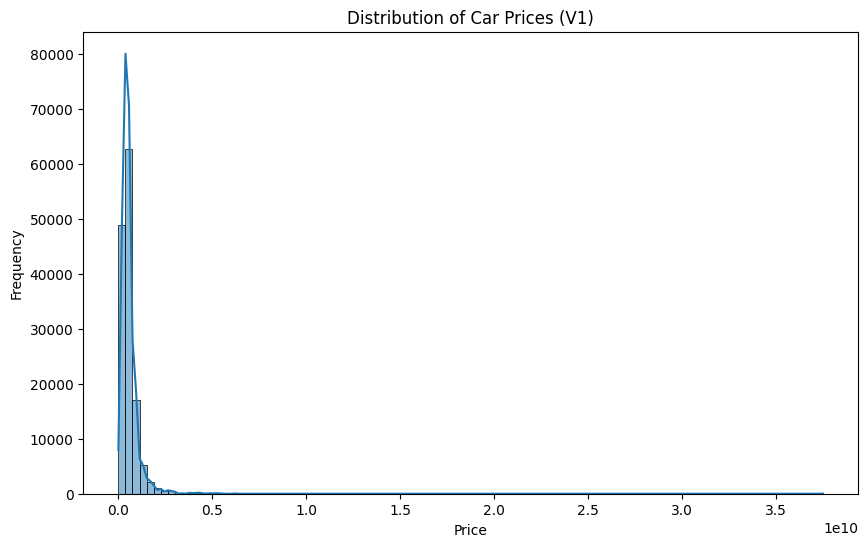

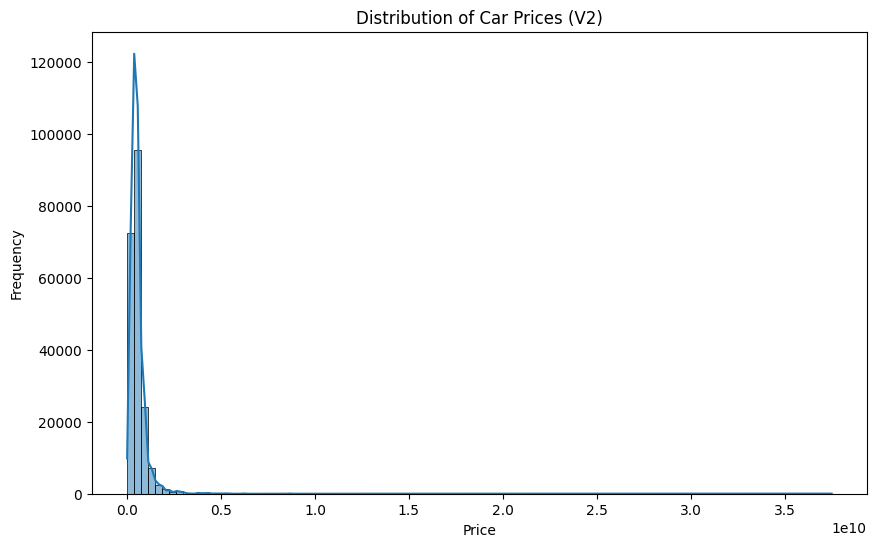

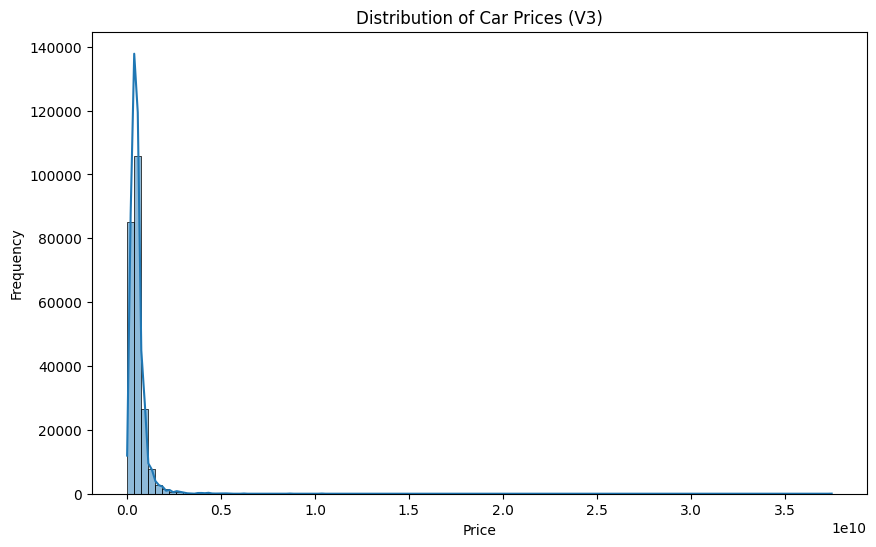

In [20]:
histplot(data_cleaned_version1, 'price', 'Distribution of Car Prices (V1)', 'Price')
histplot(data_cleaned_version2, 'price', 'Distribution of Car Prices (V2)', 'Price')
histplot(data_cleaned_version3, 'price', 'Distribution of Car Prices (V3)', 'Price')

#### Handle skewness by log transformation

In [21]:


# Log transformation for Version 1

data_cleaned_version1['log_price'] = np.log1p(data_cleaned_version1['price'])  # Using log1p to handle zero values


# Log transformation for Version 2

data_cleaned_version2['log_price'] = np.log1p(data_cleaned_version2['price'])  # Using log1p to handle zero values


# Log transformation for Version 3

data_cleaned_version3['log_price'] = np.log1p(data_cleaned_version3['price'])  # Using log1p to handle zero values


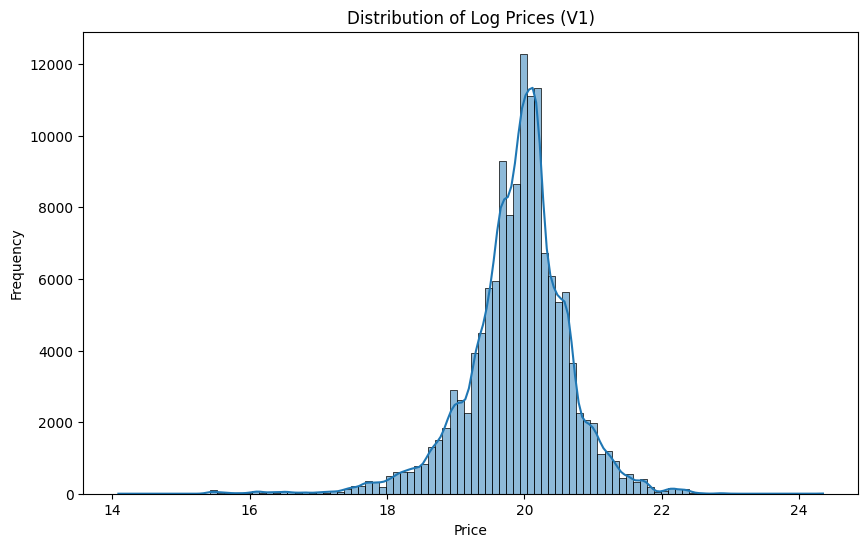

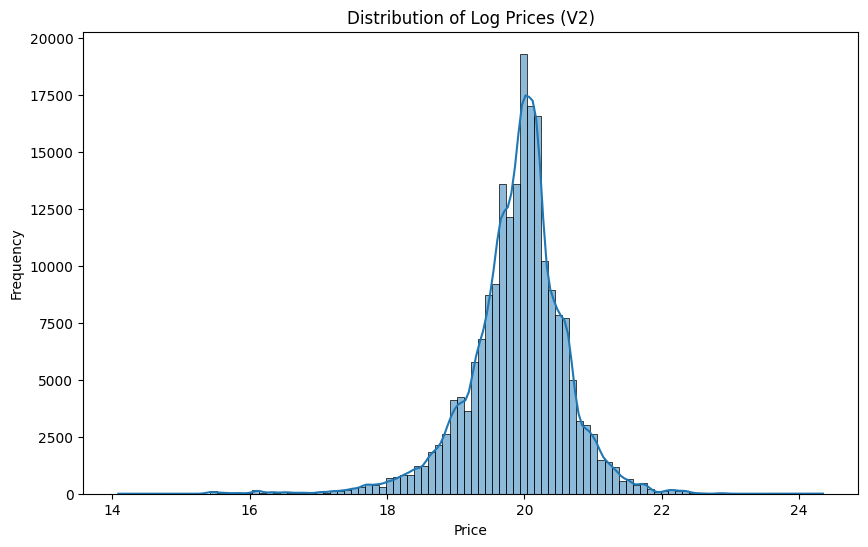

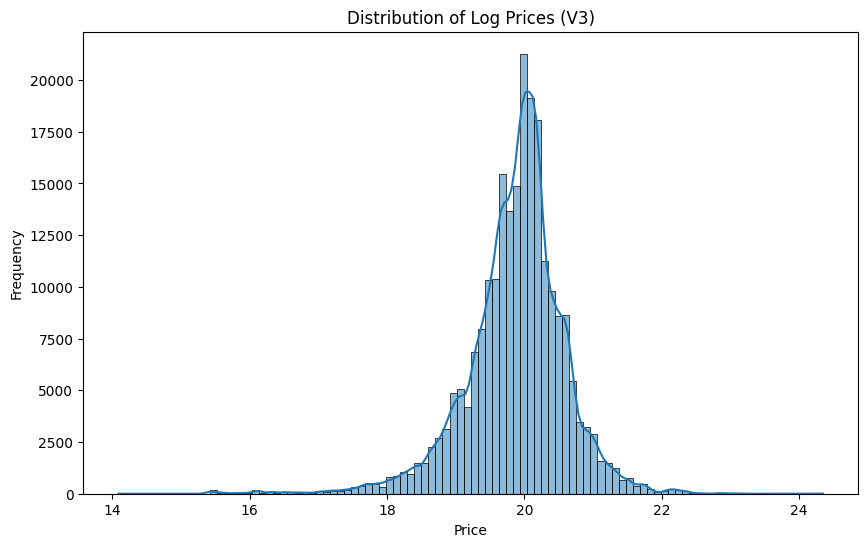

In [22]:
histplot(data_cleaned_version1, 'log_price', 'Distribution of Log Prices (V1)', 'Price')
histplot(data_cleaned_version2, 'log_price', 'Distribution of Log Prices (V2)', 'Price')
histplot(data_cleaned_version3, 'log_price', 'Distribution of Log Prices (V3)', 'Price')

#### Price and manufacture date

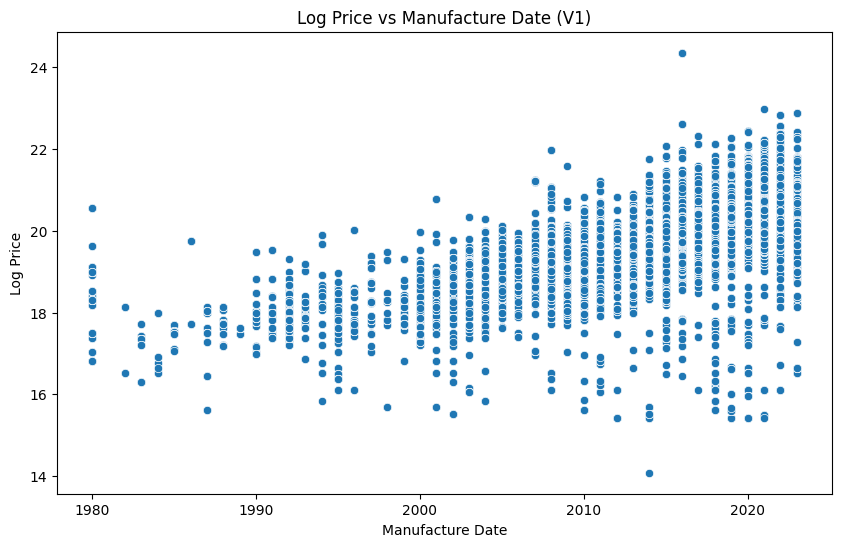

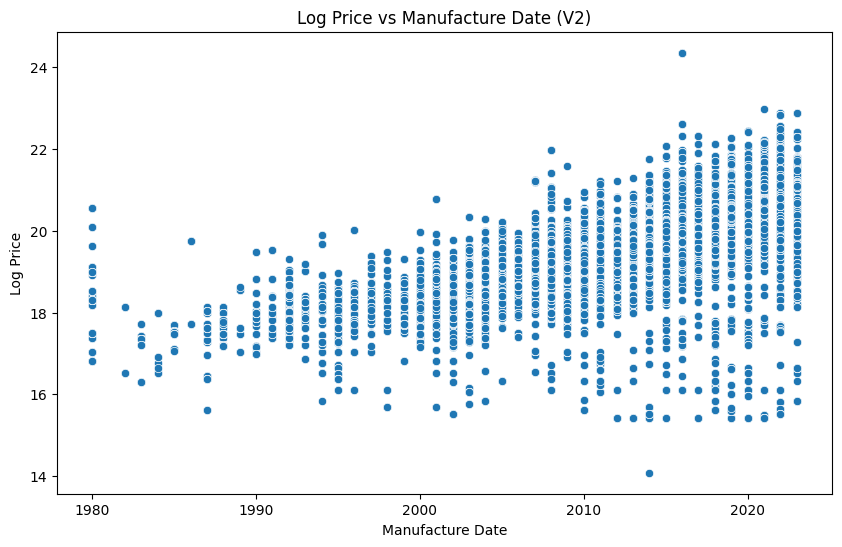

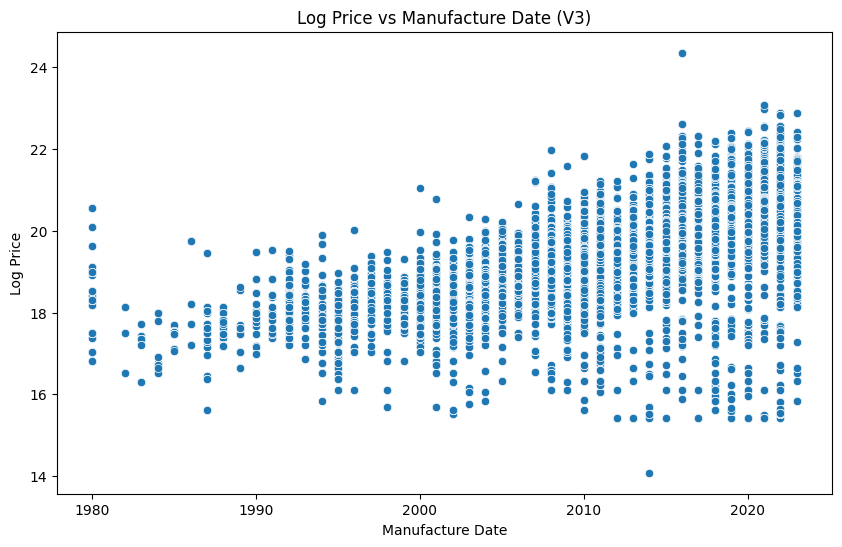

In [23]:


# Version 1
scatterplot(data_cleaned_version1, 'manufacture_date', 'log_price', 'Log Price vs Manufacture Date (V1)', 'Manufacture Date', 'Log Price')

# Version 2
scatterplot(data_cleaned_version2, 'manufacture_date', 'log_price', 'Log Price vs Manufacture Date (V2)', 'Manufacture Date', 'Log Price')

# Version 3
scatterplot(data_cleaned_version3, 'manufacture_date', 'log_price', 'Log Price vs Manufacture Date (V3)', 'Manufacture Date', 'Log Price')

#### Price and brand

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


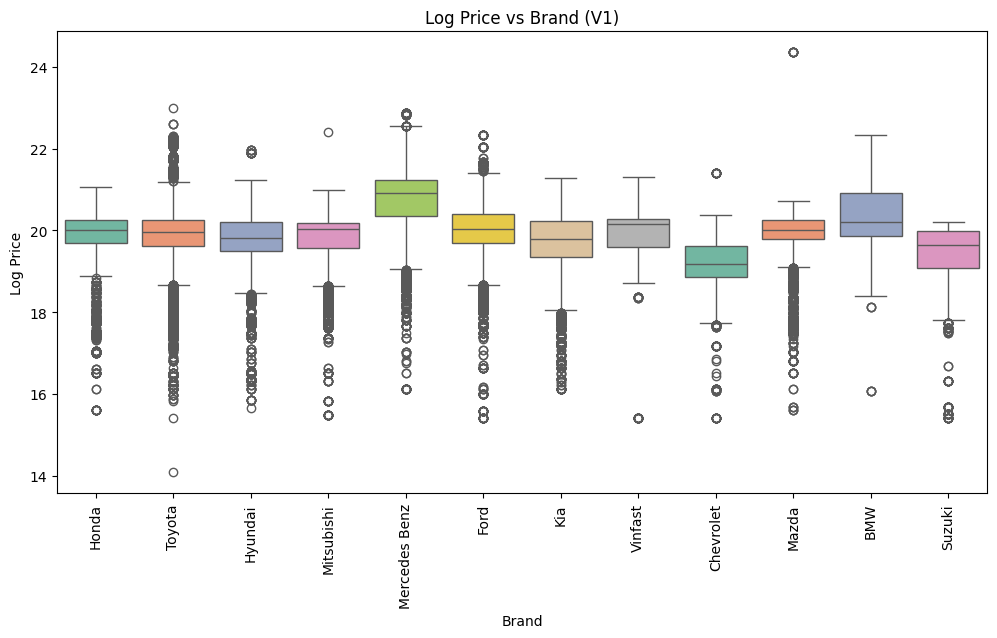

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


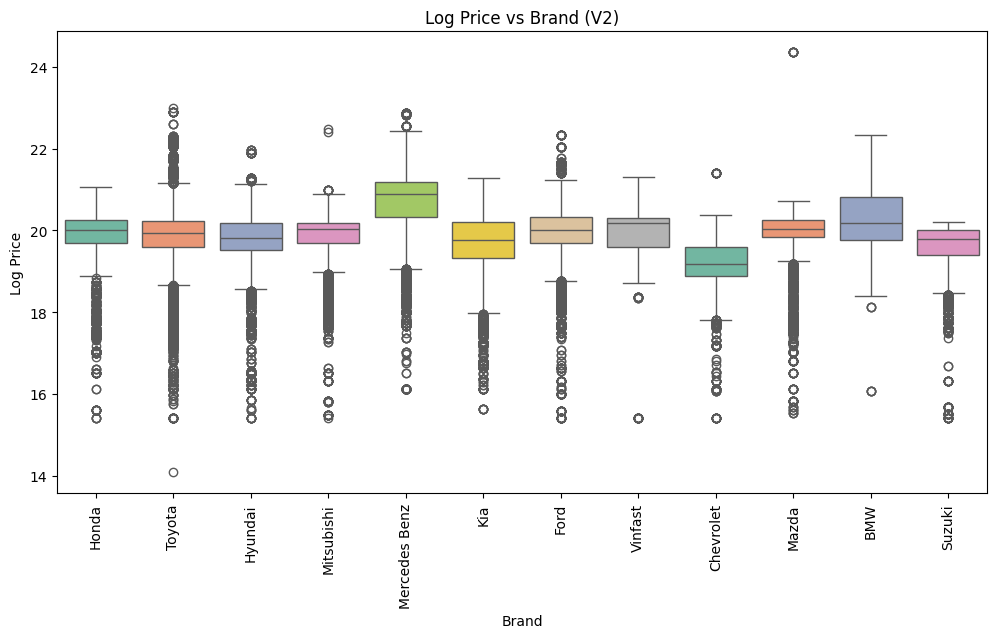

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


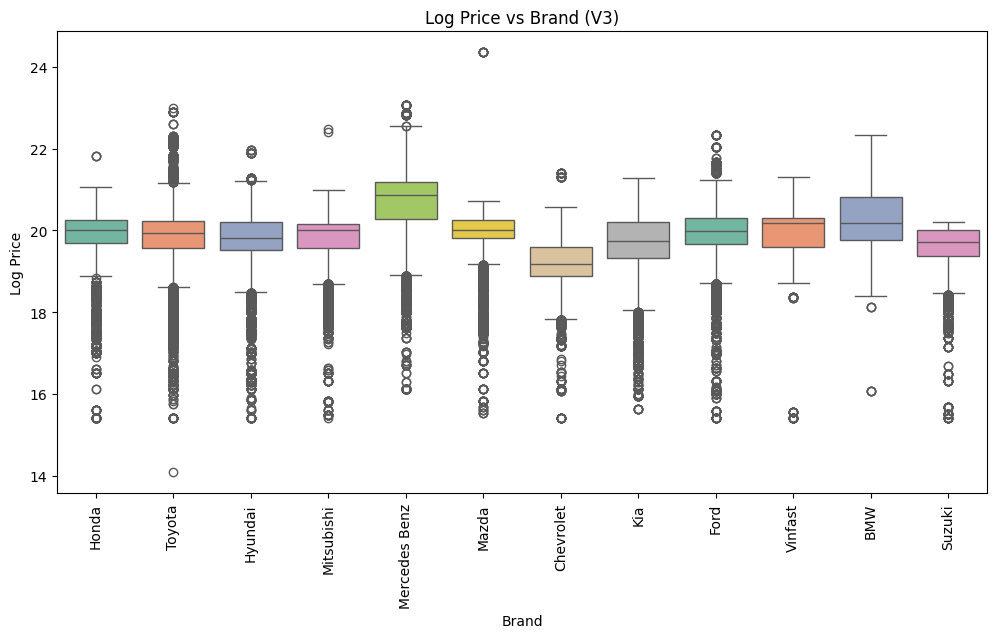

In [24]:


# Version 1
boxplot(data_cleaned_version1, 'brand', 'log_price', 'Log Price vs Brand (V1)', 'Brand', 'Log Price')

# Version 2
boxplot(data_cleaned_version2, 'brand', 'log_price', 'Log Price vs Brand (V2)', 'Brand', 'Log Price')

# Version 3
boxplot(data_cleaned_version3, 'brand', 'log_price', 'Log Price vs Brand (V3)', 'Brand', 'Log Price')

#### Price and model

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


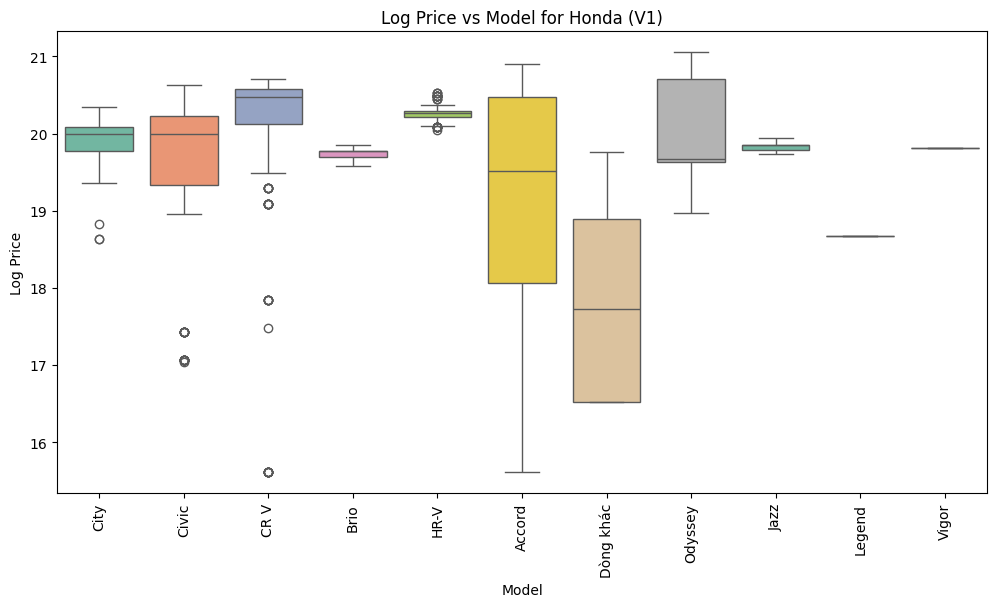

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


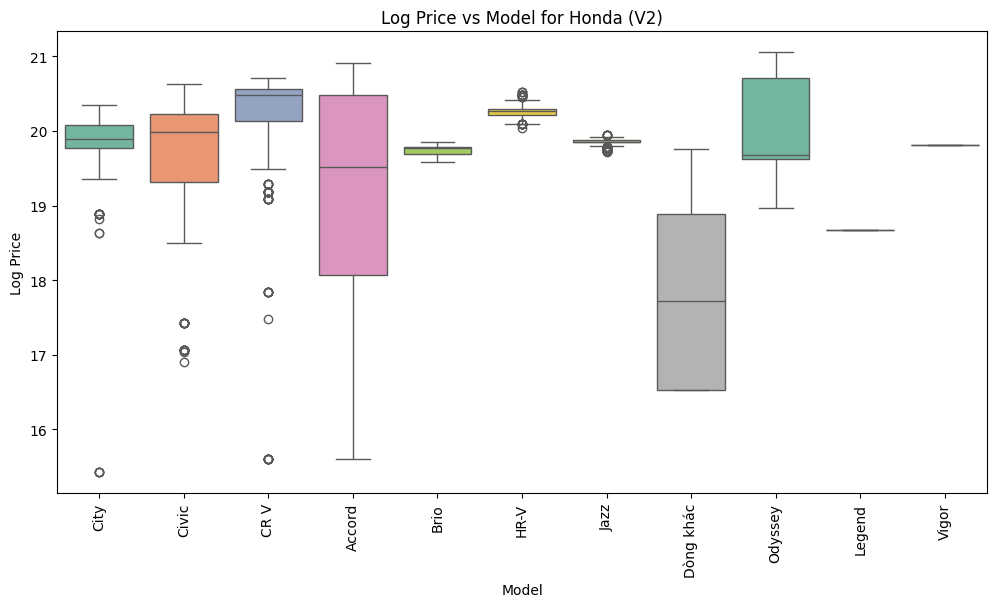

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


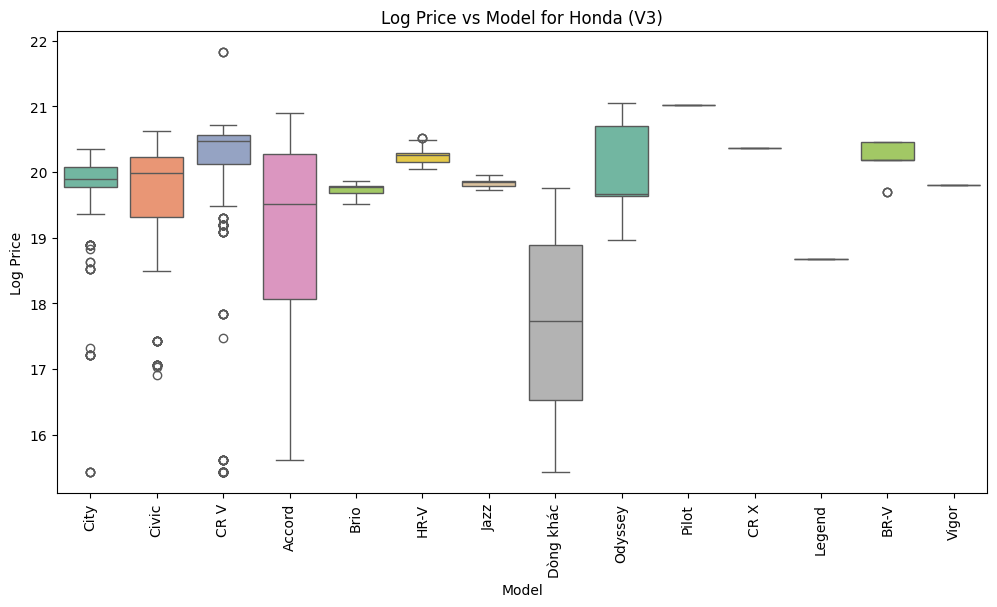

In [25]:


# Version 1
brand_a_data = data_cleaned_version1[data_cleaned_version1['brand'] == 'Honda']
boxplot(brand_a_data, 'model', 'log_price', 'Log Price vs Model for Honda (V1)', 'Model', 'Log Price')

# Version 2
brand_a_data = data_cleaned_version2[data_cleaned_version2['brand'] == 'Honda']
boxplot(brand_a_data, 'model', 'log_price', 'Log Price vs Model for Honda (V2)', 'Model', 'Log Price')

# Version 3
brand_a_data = data_cleaned_version3[data_cleaned_version3['brand'] == 'Honda']
boxplot(brand_a_data, 'model', 'log_price', 'Log Price vs Model for Honda (V3)', 'Model', 'Log Price')

#### Price and origin

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


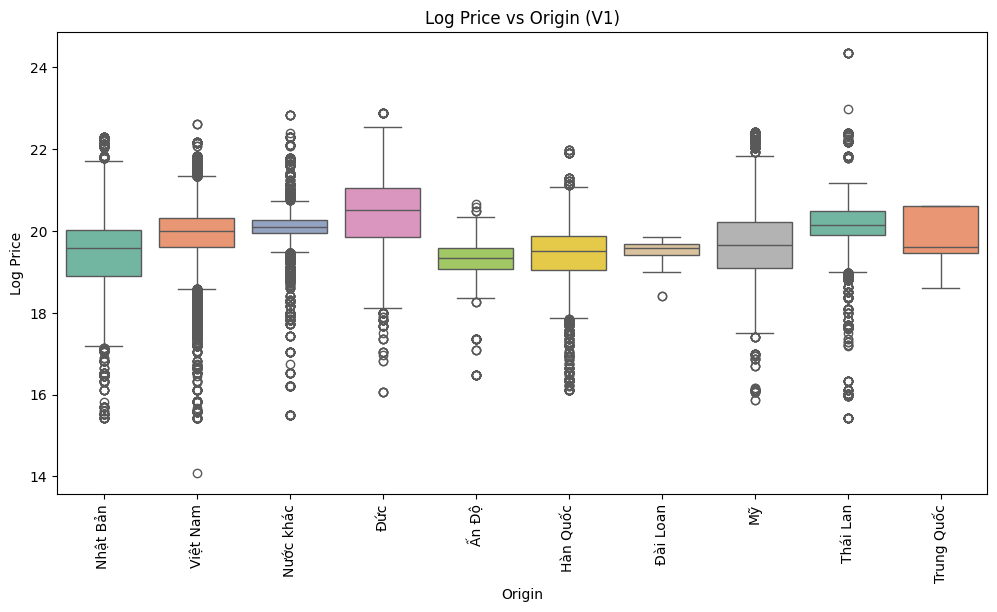

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


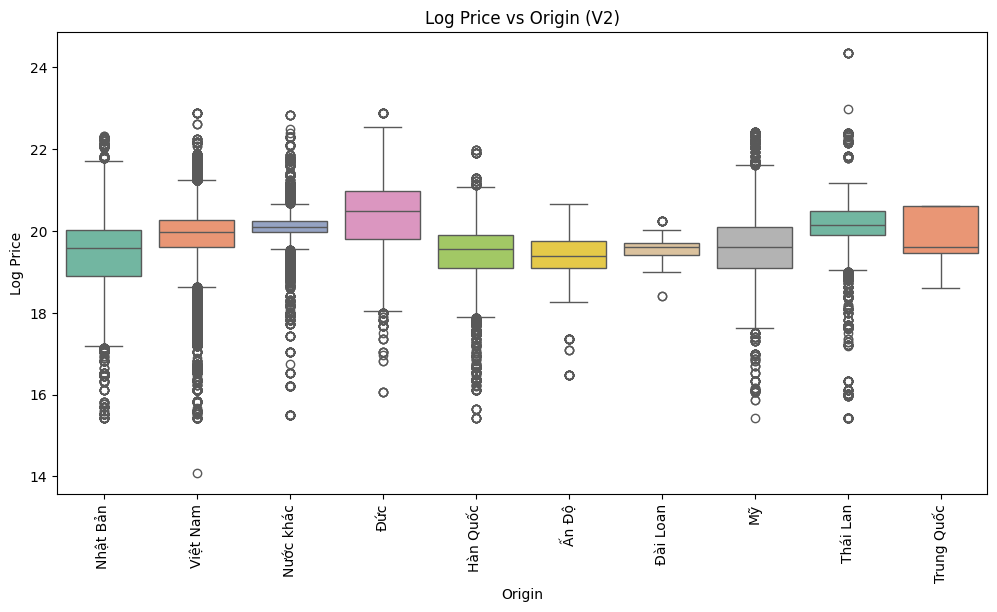

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


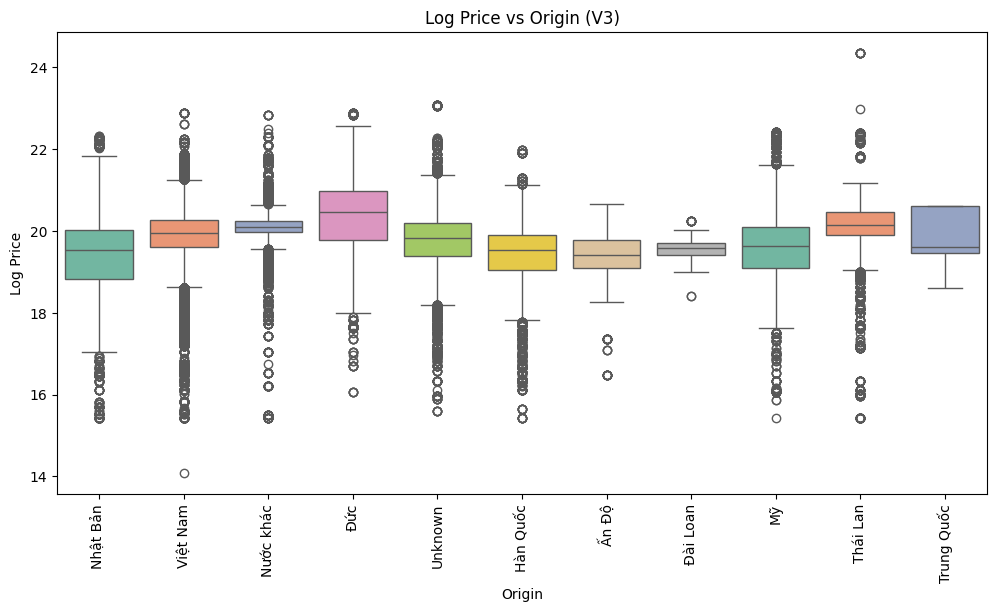

In [26]:

# Version 1
boxplot(data_cleaned_version1, 'origin', 'log_price', 'Log Price vs Origin (V1)', 'Origin', 'Log Price')

# Version 2
boxplot(data_cleaned_version2, 'origin', 'log_price', 'Log Price vs Origin (V2)', 'Origin', 'Log Price')

# Version 3
boxplot(data_cleaned_version3, 'origin', 'log_price', 'Log Price vs Origin (V3)', 'Origin', 'Log Price')


#### Price and type

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


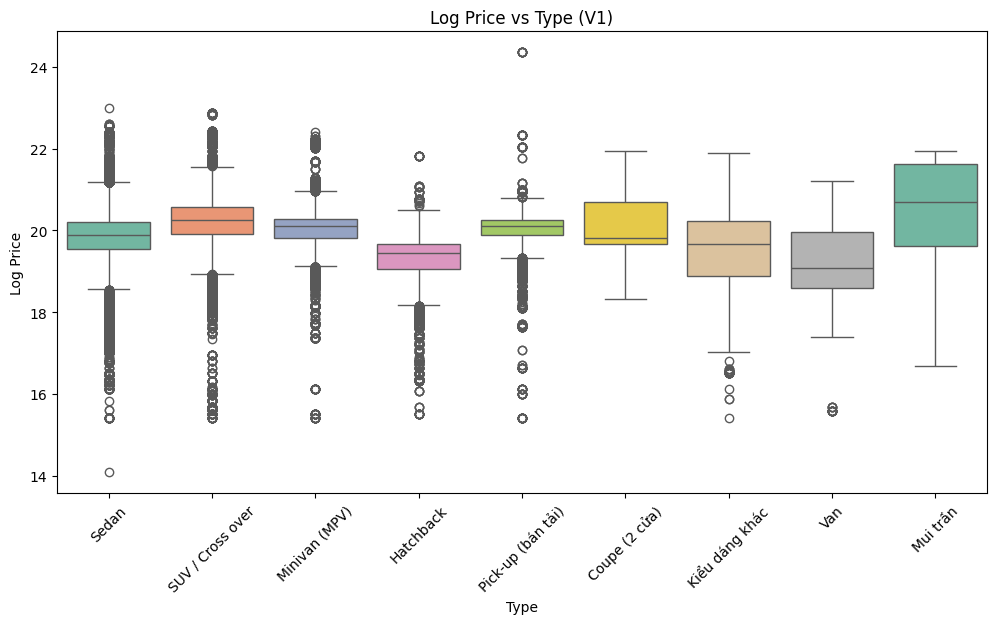

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


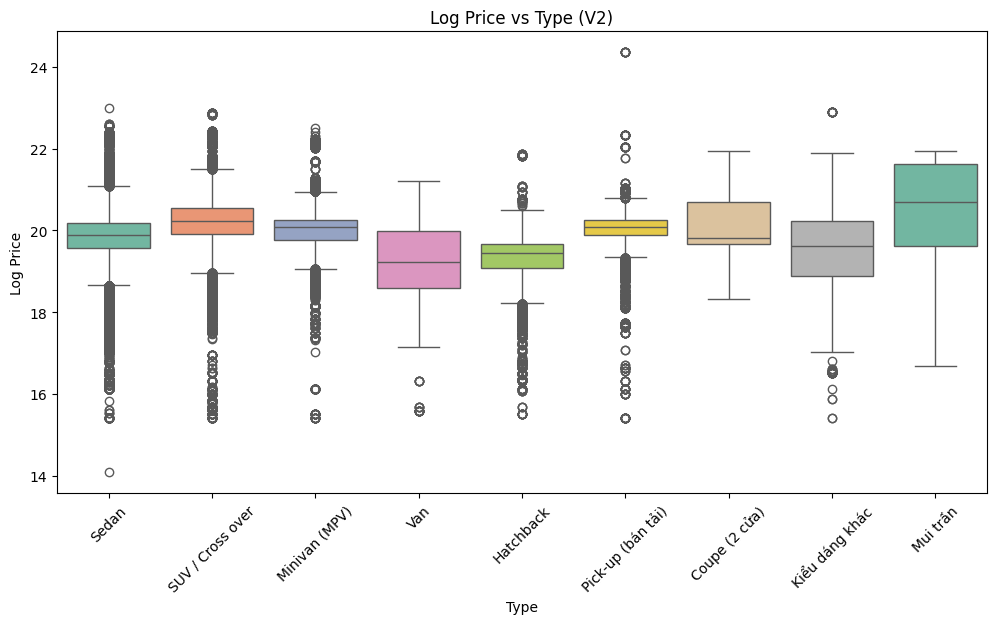

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


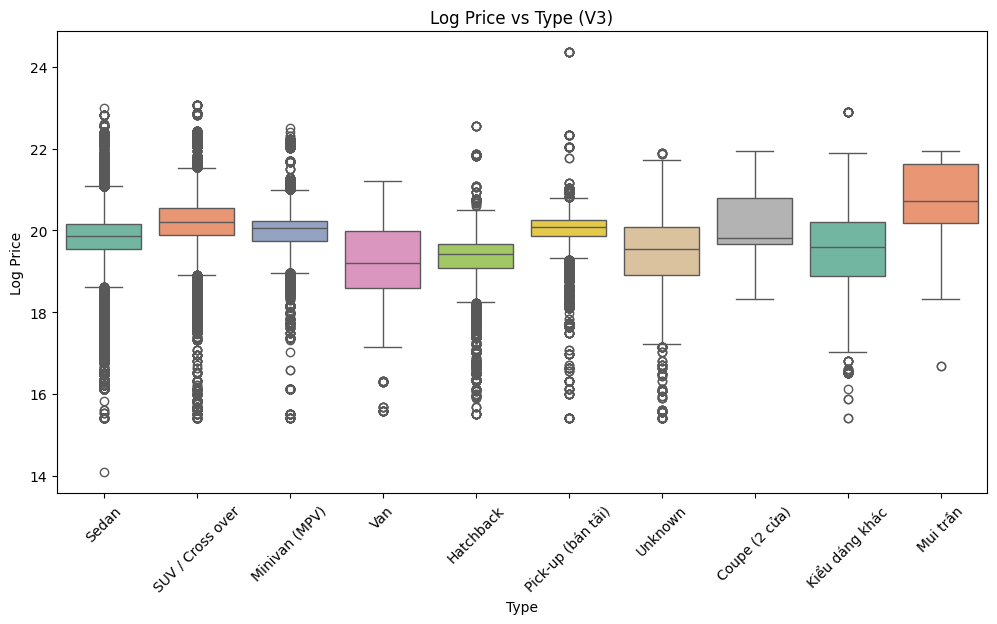

In [27]:


# Version 1
boxplot(data_cleaned_version1, 'type', 'log_price', 'Log Price vs Type (V1)', 'Type', 'Log Price', rotation=45)

# Version 2
boxplot(data_cleaned_version2, 'type', 'log_price', 'Log Price vs Type (V2)', 'Type', 'Log Price', rotation=45)

# Version 3
boxplot(data_cleaned_version3, 'type', 'log_price', 'Log Price vs Type (V3)', 'Type', 'Log Price', rotation=45)

#### Price and seats

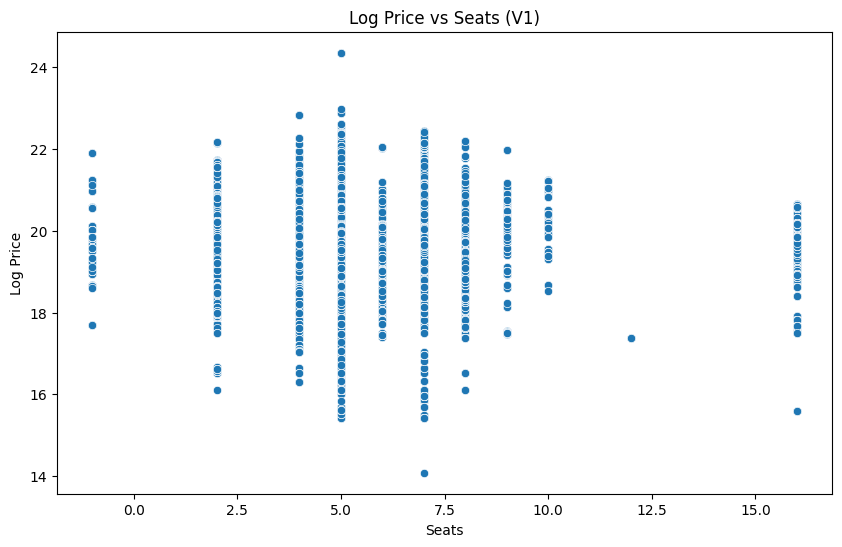

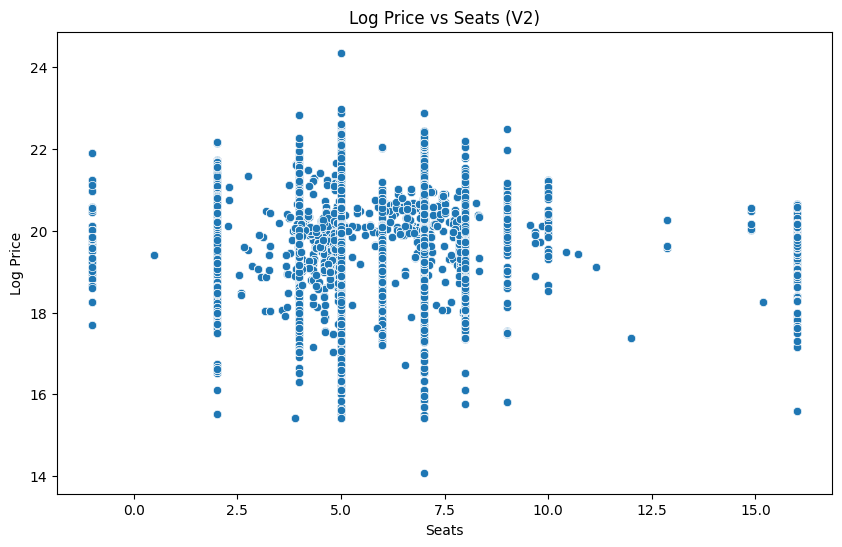

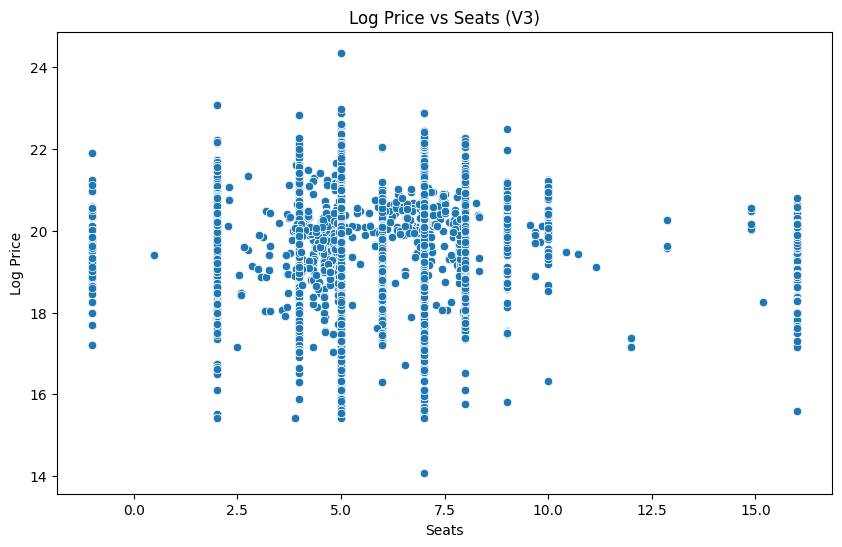

In [28]:


# Version 1
scatterplot(data_cleaned_version1, 'seats', 'log_price', 'Log Price vs Seats (V1)', 'Seats', 'Log Price')

# Version 2
scatterplot(data_cleaned_version2, 'seats', 'log_price', 'Log Price vs Seats (V2)', 'Seats', 'Log Price')

# Version 3
scatterplot(data_cleaned_version3, 'seats', 'log_price', 'Log Price vs Seats (V3)', 'Seats', 'Log Price')

#### Price and gearbox

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


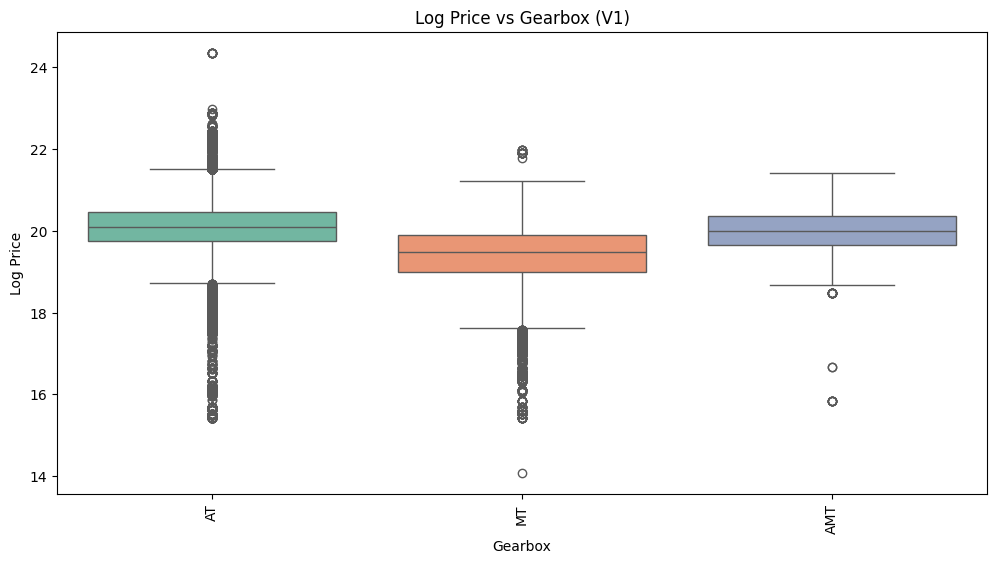

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


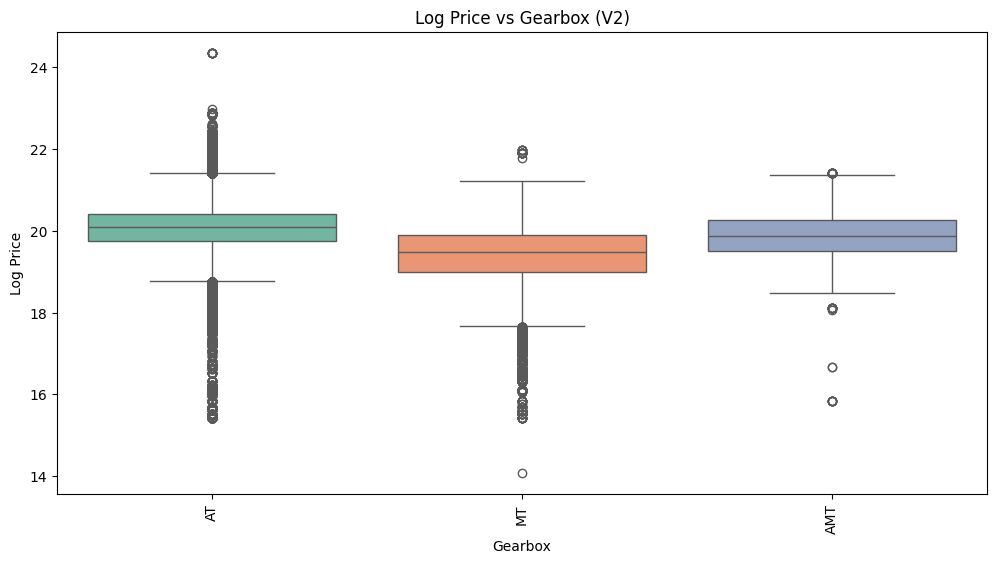

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


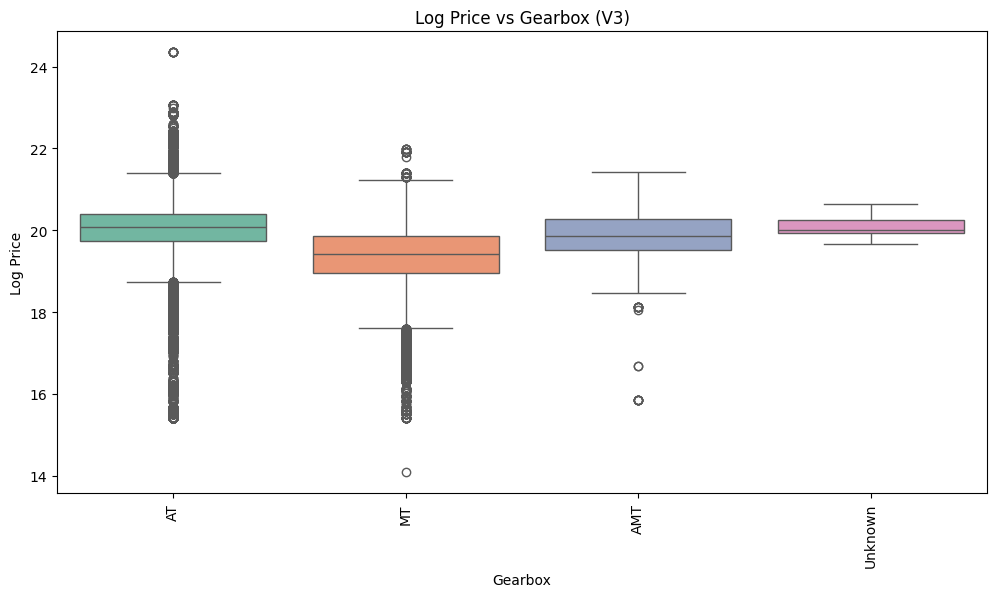

In [29]:
# prompt: boxplot(filtered_data_cleaned, 'gearbox', 'log_price', 'Log Price vs Gearbox', 'Gearbox', 'Log Price')
# do it 3

# Version 1
boxplot(data_cleaned_version1, 'gearbox', 'log_price', 'Log Price vs Gearbox (V1)', 'Gearbox', 'Log Price')

# Version 2
boxplot(data_cleaned_version2, 'gearbox', 'log_price', 'Log Price vs Gearbox (V2)', 'Gearbox', 'Log Price')

# Version 3
boxplot(data_cleaned_version3, 'gearbox', 'log_price', 'Log Price vs Gearbox (V3)', 'Gearbox', 'Log Price')

#### Price and fuel type

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


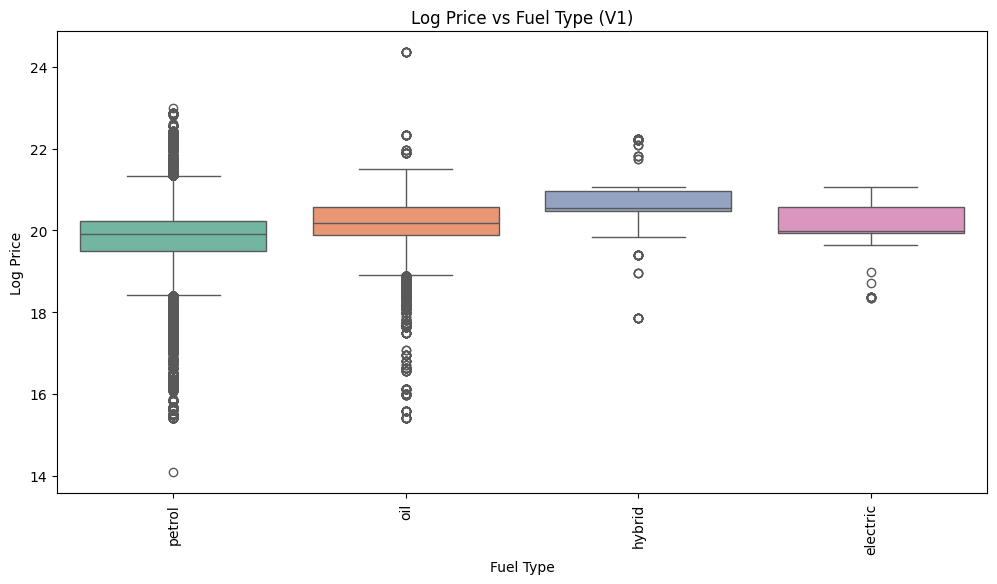

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


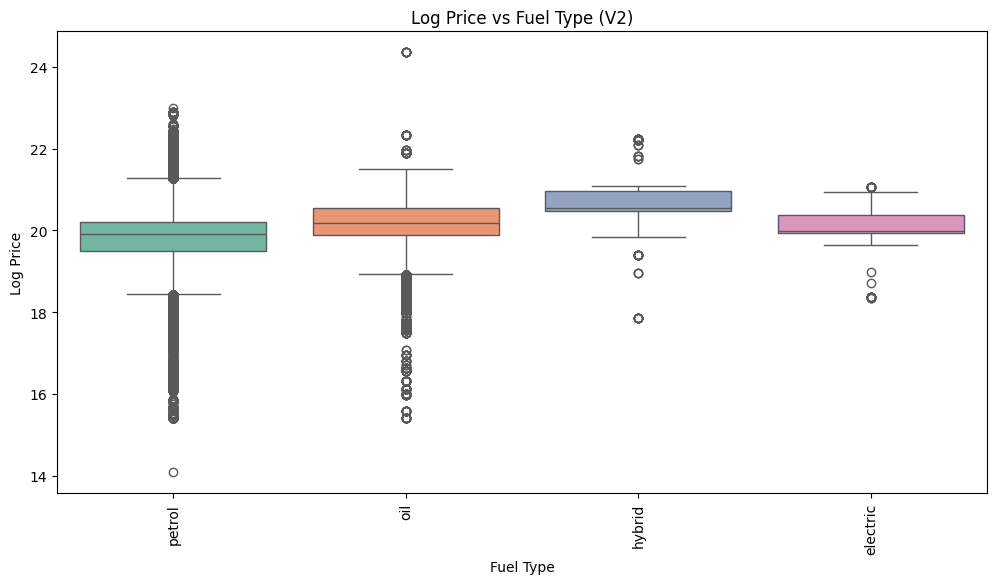

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


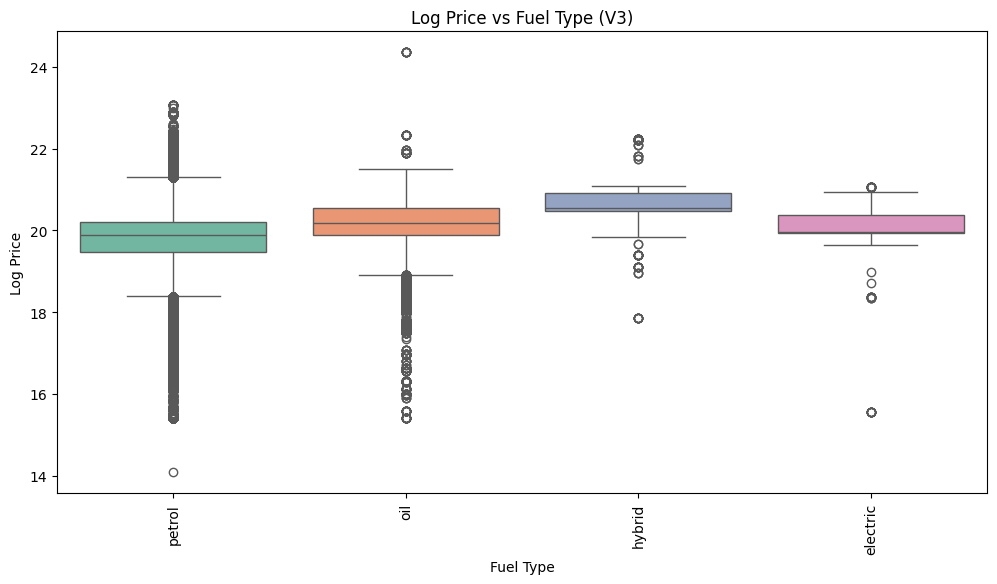

In [30]:
# prompt: boxplot(filtered_data_cleaned, 'fuel', 'log_price', 'Log Price vs Fuel Type', 'Fuel Type', 'Log Price')
# for 3 vers

# Version 1
boxplot(data_cleaned_version1, 'fuel', 'log_price', 'Log Price vs Fuel Type (V1)', 'Fuel Type', 'Log Price')

# Version 2
boxplot(data_cleaned_version2, 'fuel', 'log_price', 'Log Price vs Fuel Type (V2)', 'Fuel Type', 'Log Price')

# Version 3
boxplot(data_cleaned_version3, 'fuel', 'log_price', 'Log Price vs Fuel Type (V3)', 'Fuel Type', 'Log Price')

#### Price and color

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


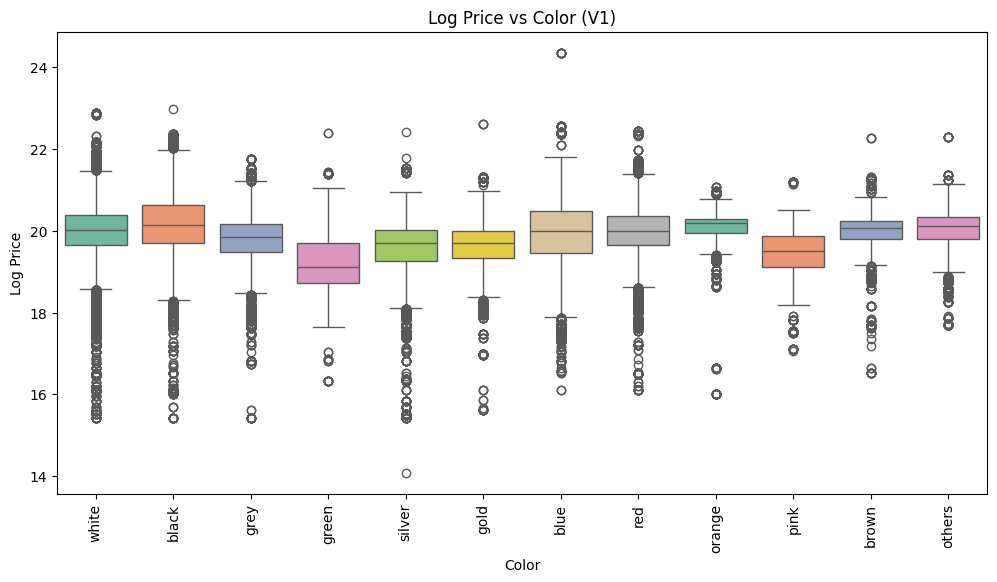

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


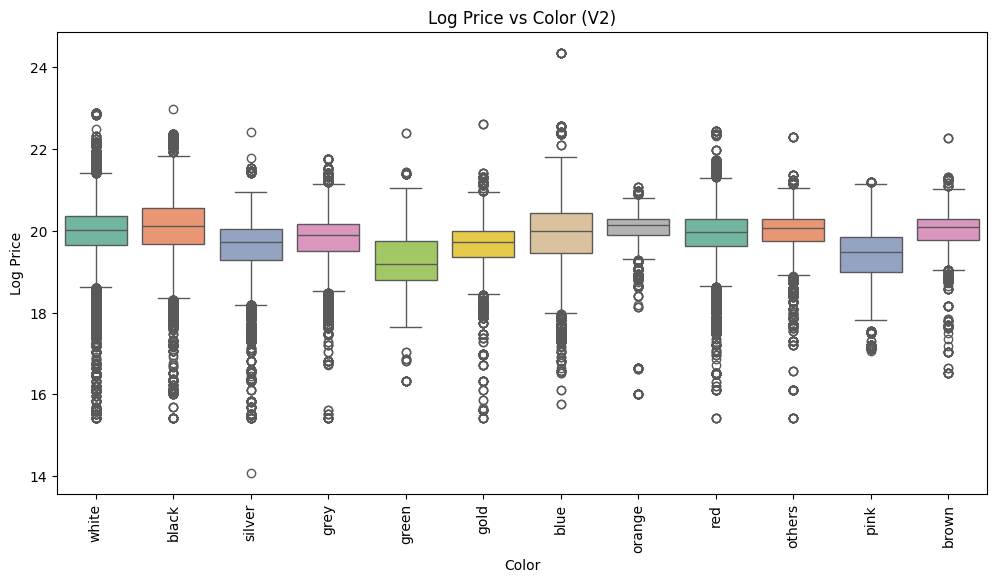

<ipython-input-19-6d8634c9c977>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette='Set2')


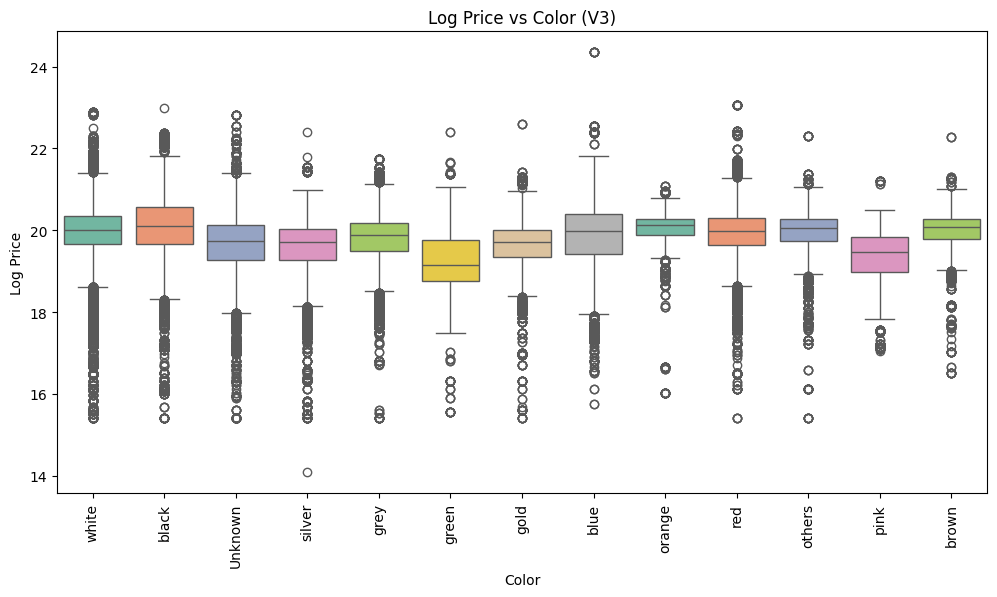

In [31]:
# prompt: boxplot(filtered_data_cleaned, 'color', 'log_price', 'Log Price vs Color', 'Color', 'Log Price')
# 3 versions

# Version 1
boxplot(data_cleaned_version1, 'color', 'log_price', 'Log Price vs Color (V1)', 'Color', 'Log Price')

# Version 2
boxplot(data_cleaned_version2, 'color', 'log_price', 'Log Price vs Color (V2)', 'Color', 'Log Price')

# Version 3
boxplot(data_cleaned_version3, 'color', 'log_price', 'Log Price vs Color (V3)', 'Color', 'Log Price')

#### Price and mileage

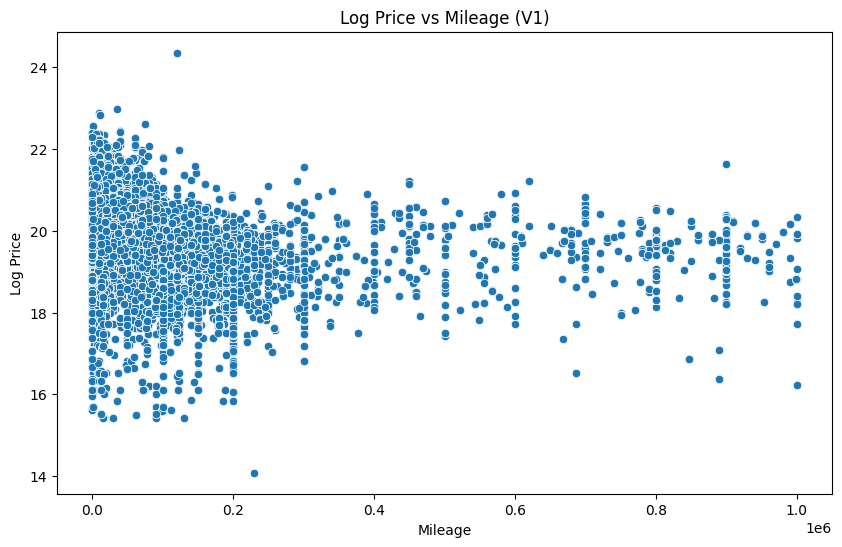

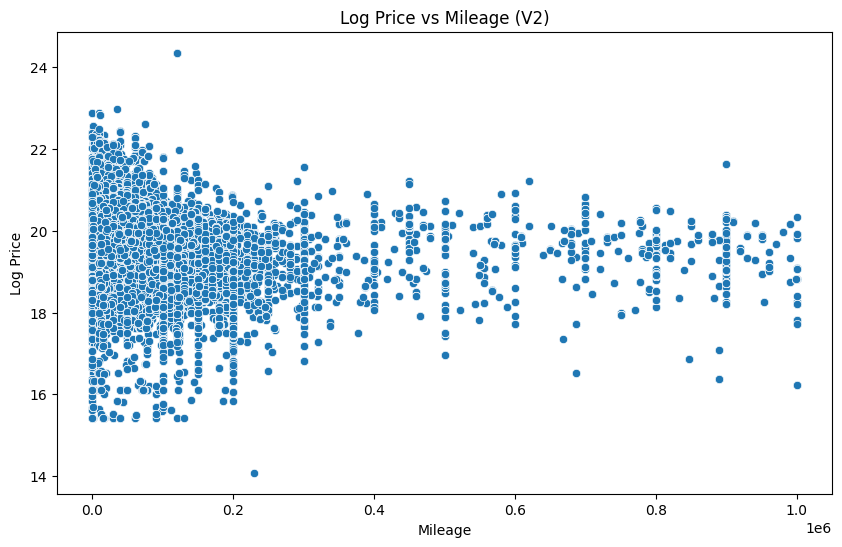

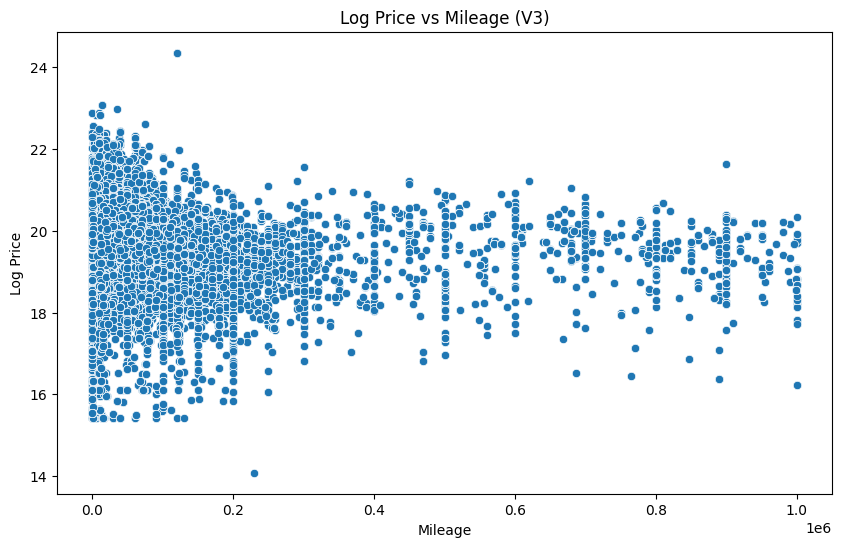

In [32]:


# Version 1
scatterplot(data_cleaned_version1, 'mileage_v2', 'log_price', 'Log Price vs Mileage (V1)', 'Mileage', 'Log Price')

# Version 2
scatterplot(data_cleaned_version2, 'mileage_v2', 'log_price', 'Log Price vs Mileage (V2)', 'Mileage', 'Log Price')

# Version 3
scatterplot(data_cleaned_version3, 'mileage_v2', 'log_price', 'Log Price vs Mileage (V3)', 'Mileage', 'Log Price')

### Compare two cars in the same segment

To compare two cars in the same price segment, follow these steps:

1. **Segment Cars by Price**: Group cars into categories such as under 300M, 300M-500M, etc.
2. **Select Two Cars**: Randomly choose two cars from the same segment.
3. **Compare Key Features**: Evaluate important specifications like brand, model, price, fuel type, mileage, and seating capacity.

This streamlined approach simplifies the decision-making process, allowing buyers to easily compare vehicles within a similar price range and make informed choices based on relevant features.


In [33]:
# Define price segments (you can adjust these ranges based on your dataset)
comparison_data = data_cleaned_version1.copy()
bins = [0, 300_000_000, 500_000_000, 700_000_000, 1_000_000_000, float('inf')]
labels = ['<300M', '300M-500M', '500M-700M', '700M-1B', '>1B']

# Assign each car to a price segment
comparison_data['price_segment'] = pd.cut(comparison_data['price'], bins=bins, labels=labels)

In [34]:
import pandas as pd
import random

# Assuming data_cleaned_version1 DataFrame is already loaded as in the previous code

def compare_random_cars(data, segment):
    # Filter cars in the specified price segment
    segment_data = data[data['price_segment'] == segment]
    if len(segment_data) < 2:
        print(f"Not enough cars in the '{segment}' segment to compare.")
        return None

    # Randomly select two cars
    random_cars = segment_data.sample(n=2)  # Randomly select 2 cars
    car1 = random_cars.iloc[0]
    car2 = random_cars.iloc[1]

    # Create car names for comparison
    name1 = car1['brand'] + ' ' + car1['model']
    name2 = car2['brand'] + ' ' + car2['model']

    # Select features to compare
    features = data.columns.tolist()

    # Create the comparison table
    comparison_table = pd.DataFrame({'Feature': features}, index=None)
    comparison_table[f'{name1}'] = [car1[feature] for feature in features]
    comparison_table[f'{name2}'] = [car2[feature] for feature in features]

    # Format the 'Feature' column (remove underscores and capitalize words)
    comparison_table['Feature'] = comparison_table['Feature'].str.replace('_', ' ').str.title()

    # Format the 'Price' column with commas
    for car in [name1, name2]:
        if 'Price' in comparison_table.index:
            comparison_table.loc['Price', car] = "{:,}".format(comparison_table.loc['Price', car])

    comparison_table.set_index('Feature', inplace=True)
    return comparison_table

# Example usage: Compare two random cars from the '300M-500M' segment
segment_to_compare = '300M-500M'
comparison_result = compare_random_cars(comparison_data, segment_to_compare)

if comparison_result is not None:
    print(f"\nComparison of two random cars from the '{segment_to_compare}' segment:")
    display(comparison_result)  # Use display() for better output in Colab



Comparison of two random cars from the '300M-500M' segment:


,Ford Ranger,Hyundai Kona
Feature,,
Manufacture Date,2016,2019
Brand,Ford,Hyundai
Model,Ranger,Kona
Origin,Thái Lan,Việt Nam
Type,Pick-up (bán tải),SUV / Cross over
Seats,5.0,5.0
Gearbox,MT,AT
Fuel,oil,petrol
Color,white,black


### Feature engineering and selection

#### Transforming manufacture year to car age

- Transforming the manufacture year into car age:
  - Simplifies the relationship between the feature and the target (price).
  - Improves the model's ability to learn and predict by providing a more meaningful numerical feature.
  - Ensures time-independence, making the feature consistent regardless of the training or analysis year.


In [35]:
current_year = 2024

# Version 1
data_cleaned_version1['car_age'] = current_year - data_cleaned_version1['manufacture_date']

# Version 2
data_cleaned_version2['car_age'] = current_year - data_cleaned_version2['manufacture_date']

# Version 3
data_cleaned_version3['car_age'] = current_year - data_cleaned_version3['manufacture_date']

#### Train-test splitting

In [36]:
features = [
  'car_age',
  'brand',
  'model',
  'origin',
  'type',
  'seats',
  'gearbox',
  'fuel',
  'color',
  'mileage_v2',
  'condition'
  ]

X1 = data_cleaned_version1[features]
y1 = data_cleaned_version1[['log_price', 'price']]

X1_train, X_test, y1_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
y1_train_log_price = y1_train['log_price']
y1_train_price = y1_train['price']

y_test_log_price = y_test['log_price']
y_test_price = y_test['price']

In [37]:
X_test

,car_age,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,condition
40018,3,Mitsubishi,Xpander,Nước khác,Minivan (MPV),7.0,AT,petrol,brown,25000,used
85648,2,Toyota,Innova,Việt Nam,SUV / Cross over,7.0,AT,petrol,white,33400,used
69655,2,Ford,Ranger,Thái Lan,Pick-up (bán tải),5.0,AT,oil,white,10000,used
87402,4,Kia,Cerato,Việt Nam,Sedan,5.0,AT,petrol,black,23000,used
120358,2,Toyota,Camry,Thái Lan,Sedan,5.0,AT,petrol,black,7700,used
...,...,...,...,...,...,...,...,...,...,...,...
87659,4,Mitsubishi,Triton,Thái Lan,Pick-up (bán tải),5.0,AT,oil,orange,21800,used
18906,14,Toyota,Venza,Nước khác,SUV / Cross over,5.0,AT,petrol,white,60555,used
29829,3,Vinfast,Fadil,Việt Nam,Hatchback,5.0,AT,petrol,red,9200,used
83885,9,Honda,City,Việt Nam,Sedan,5.0,AT,petrol,white,60000,used


In [38]:
test_set_indices = X_test.index
# Version 2
X2 = data_cleaned_version2[features]
y2 = data_cleaned_version2[['log_price', 'price']]

X2_train = X2.drop(test_set_indices)
y2_train = y2.drop(test_set_indices)

y2_train_log_price = y2_train['log_price']
y2_train_price = y2_train['price']

# Version 3
X3 = data_cleaned_version3[features]
y3 = data_cleaned_version3[['log_price', 'price']]

X3_train = X3.drop(test_set_indices)
y3_train = y3.drop(test_set_indices)

y3_train_log_price = y3_train['log_price']
y3_train_price = y3_train['price']

In [39]:
print(f'X1_train shape: {X1_train.shape}')
print(f'X2_train shape: {X2_train.shape}')
print(f'X3_train shape: {X3_train.shape}')

X1_train shape: (110935, 11)
X2_train shape: (177422, 11)
X3_train shape: (203755, 11)


#### Normalize and encode the training data

In [40]:
categorical_features = ['brand', 'model', 'origin', 'type', 'gearbox', 'fuel', 'color']
numerical_features = ['seats', 'mileage_v2', 'car_age']

# Version 1
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])
X1_train = preprocessor1.fit_transform(X1_train[features])
X1_test = preprocessor1.transform(X_test)
joblib.dump(preprocessor1, './models/preprocessor1.pkl')
one_hot_columns1 = preprocessor1.transformers_[1][1].get_feature_names_out(categorical_features)
all_columns1 = numerical_features + list(one_hot_columns1)
X1_train = X1_train.toarray()
X1_train = pd.DataFrame(X1_train, columns=all_columns1)
X1_test = X1_test.toarray()
X1_test = pd.DataFrame(X1_test, columns=all_columns1)

# Version 2
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])
X2_train = preprocessor2.fit_transform(X2_train[features])
X2_test = preprocessor2.transform(X_test)
joblib.dump(preprocessor2, './models/preprocessor2.pkl')
one_hot_columns2 = preprocessor2.transformers_[1][1].get_feature_names_out(categorical_features)
all_columns2 = numerical_features + list(one_hot_columns2)
X2_train = X2_train.toarray()
X2_train = pd.DataFrame(X2_train, columns=all_columns2)
X2_test = X2_test.toarray()
X2_test = pd.DataFrame(X2_test, columns=all_columns2)


# Version 3
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])
X3_train = preprocessor3.fit_transform(X3_train[features])
X3_test = preprocessor3.transform(X_test)
joblib.dump(preprocessor3, './models/preprocessor3.pkl')
one_hot_columns3 = preprocessor3.transformers_[1][1].get_feature_names_out(categorical_features)
all_columns3 = numerical_features + list(one_hot_columns3)
X3_train = X3_train.toarray()
X3_train = pd.DataFrame(X3_train, columns=all_columns3)
X3_test = X3_test.toarray()
X3_test = pd.DataFrame(X3_test, columns=all_columns3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [41]:
# prompt: print shape of X1_train, X2_train, X3_train

print(f'X1_train shape: {X1_train.shape}')
print(f'X2_train shape: {X2_train.shape}')
print(f'X3_train shape: {X3_train.shape}')

X1_train shape: (110935, 307)
X2_train shape: (177422, 308)
X3_train shape: (203755, 332)


# Training model

## XGBoost

In [42]:
from xgboost import XGBRegressor

#### Loss: MSE

In [43]:


# Version 1
xgb_mse_model1 = XGBRegressor(n_estimators=100, random_state=42)
xgb_mse_model1.fit(X1_train, y1_train_log_price)
y_pred_xgb_mse1 = xgb_mse_model1.predict(X1_test)
y_pred_xgb_mse_price1 = np.expm1(y_pred_xgb_mse1)
joblib.dump(xgb_mse_model1, './models/xgb_mse_model1.pkl')

# Version 2
xgb_mse_model2 = XGBRegressor(n_estimators=100, random_state=42)
xgb_mse_model2.fit(X2_train, y2_train_log_price)
y_pred_xgb_mse2 = xgb_mse_model2.predict(X2_test)
y_pred_xgb_mse_price2 = np.expm1(y_pred_xgb_mse2)
joblib.dump(xgb_mse_model2, './models/xgb_mse_model2.pkl')

# Version 3
xgb_mse_model3 = XGBRegressor(n_estimators=100, random_state=42)
xgb_mse_model3.fit(X3_train, y3_train_log_price)
y_pred_xgb_mse3 = xgb_mse_model3.predict(X3_test)
y_pred_xgb_mse_price3 = np.expm1(y_pred_xgb_mse3)
joblib.dump(xgb_mse_model3, './models/xgb_mse_model3.pkl')

['./models/xgb_mse_model3.pkl']

#### Loss: MAE

In [44]:


# Version 1
xgb_mae_model1 = XGBRegressor(n_estimators=100, random_state=42, objective="reg:gamma", eval_metric="mae")
xgb_mae_model1.fit(X1_train, y1_train_log_price)
y_pred_xgb_mae1 = xgb_mae_model1.predict(X1_test)
y_pred_xgb_mae_price1 = np.expm1(y_pred_xgb_mae1)
joblib.dump(xgb_mae_model1, './models/xgb_mae_model1.pkl')

# Version 2
xgb_mae_model2 = XGBRegressor(n_estimators=100, random_state=42, objective="reg:gamma", eval_metric="mae")
xgb_mae_model2.fit(X2_train, y2_train_log_price)
y_pred_xgb_mae2 = xgb_mae_model2.predict(X2_test)
y_pred_xgb_mae_price2 = np.expm1(y_pred_xgb_mae2)
joblib.dump(xgb_mae_model2, './models/xgb_mae_model2.pkl')

# Version 3
xgb_mae_model3 = XGBRegressor(n_estimators=100, random_state=42, objective="reg:gamma", eval_metric="mae")
xgb_mae_model3.fit(X3_train, y3_train_log_price)
y_pred_xgb_mae3 = xgb_mae_model3.predict(X3_test)
y_pred_xgb_mae_price3 = np.expm1(y_pred_xgb_mae3)
joblib.dump(xgb_mae_model3, './models/xgb_mae_model3.pkl')

['./models/xgb_mae_model3.pkl']

# Evaluate model

**Model Evaluation Metrics Discussion**

When evaluating a regression model, especially on a dataset with skewed distributions like car prices, it's essential to consider metrics that capture both **percentage-based errors** and **absolute errors**. This is because the data can be heavily skewed, where most of the cars have lower prices, but a few might be very expensive.

**Key Challenges:**

- **Percentage-based metrics (e.g., MAPE, SMAPE):**
   - These metrics express the error as a percentage, making it easier to interpret, especially for lower-priced cars. However, a small percentage error on high-priced cars can still translate to a significant monetary error, which could dominate the evaluation.
   
- **Absolute error metrics (e.g., MAE, MSE):**
   - These metrics measure the error in absolute terms, which is helpful to understand how much money you are off in predictions. However, when the data is skewed, the error from expensive cars can overwhelm the evaluation, making it look like the model is underperforming, even if the majority of the predictions are quite accurate.

**Balanced Metrics:**

Given the skewed nature of the data, we need a **balanced evaluation** that considers both the **relative** and **absolute** errors. Below are some metrics that can address these challenges:

- **Symmetric Mean Absolute Percentage Error (SMAPE):**
   - SMAPE is a good choice when dealing with percentage errors, as it adjusts for symmetry and avoids the issues of zero values in the denominator. It provides a percentage error that balances both small and large values effectively.

- **Mean Absolute Error (MAE):**
   - MAE provides a clear picture of how much money you are off on average. It tells us the **absolute error**, which is crucial for applications where monetary loss is a key concern.

- **Log-Cosh Loss:**
   - Log-Cosh Loss is less sensitive to outliers than MAE or MSE because it applies the logarithm to the squared error. This is helpful when dealing with expensive cars that could otherwise disproportionately affect the error.

- **Root Mean Squared Error (RMSE):**
   - RMSE penalizes larger errors more than MAE, making it a good metric to account for significant deviations, especially with high-value cars. However, it can be sensitive to outliers.

- **Geometric Mean Absolute Error (GMAE):**
   - GMAE combines absolute and relative error, making it an effective metric for datasets with skewed distributions. It emphasizes smaller errors but still penalizes large mistakes, especially with expensive cars.

- **R-Squared (on Log-Transformed Target):**
   - R-Squared shows how well the model explains the variance in the data. Applying it to a **log-transformed price** helps account for the skewed nature of the target variable and gives a better understanding of how well the model fits the data.


## Metrics


In [45]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error, r2_score

### Percentage-based Metrics

#### Mean Absolute Percentage Error (MAPE)

In [46]:


mape_xgb_mse_v1 = mean_absolute_percentage_error(y_test_price, y_pred_xgb_mse_price1)
print(f"MAPE (XGBoost - MSE loss - Version 1): {100*mape_xgb_mse_v1:4f}%")
mape_xgb_mae_v1 = mean_absolute_percentage_error(y_test_price, y_pred_xgb_mae_price1)
print(f"MAPE (XGBoost - MAE loss - Version 1): {100*mape_xgb_mae_v1:4f}%")
mape_xgb_mse_v2 = mean_absolute_percentage_error(y_test_price, y_pred_xgb_mse_price2)
print(f"MAPE (XGBoost - MSE loss - Version 2): {100*mape_xgb_mse_v2:4f}%")
mape_xgb_mae_v2 = mean_absolute_percentage_error(y_test_price, y_pred_xgb_mae_price2)
print(f"MAPE (XGBoost - MAE loss - Version 2): {100*mape_xgb_mae_v2:4f}%")
mape_xgb_mse_v3 = mean_absolute_percentage_error(y_test_price, y_pred_xgb_mse_price3)
print(f"MAPE (XGBoost - MSE loss - Version 3): {100*mape_xgb_mse_v3:4f}%")
mape_xgb_mae_v3 = mean_absolute_percentage_error(y_test_price, y_pred_xgb_mae_price3)
print(f"MAPE (XGBoost - MAE loss - Version 3): {100*mape_xgb_mae_v3:4f}%")

MAPE (XGBoost - MSE loss - Version 1): 19.283757%
MAPE (XGBoost - MAE loss - Version 1): 18.982555%
MAPE (XGBoost - MSE loss - Version 2): 19.113970%
MAPE (XGBoost - MAE loss - Version 2): 21.347797%
MAPE (XGBoost - MSE loss - Version 3): 20.458374%
MAPE (XGBoost - MAE loss - Version 3): 20.987387%


#### Symmetric Mean Absolute Percentage Error (SMAPE)

In [47]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

smape_xgb_mse_v1 = smape(y_test_price, y_pred_xgb_mse_price1)
print(f"SMAPE (XGBoost - MSE loss - Version 1): {smape_xgb_mse_v1:.4f}%")

smape_xgb_mae_v1 = smape(y_test_price, y_pred_xgb_mae_price1)
print(f"SMAPE (XGBoost - MAE loss - Version 1): {smape_xgb_mae_v1:.4f}%")

smape_xgb_mse_v2 = smape(y_test_price, y_pred_xgb_mse_price2)
print(f"SMAPE (XGBoost - MSE loss - Version 2): {smape_xgb_mse_v2:.4f}%")

smape_xgb_mae_v2 = smape(y_test_price, y_pred_xgb_mae_price2)
print(f"SMAPE (XGBoost - MAE loss - Version 2): {smape_xgb_mae_v2:.4f}%")

smape_xgb_mse_v3 = smape(y_test_price, y_pred_xgb_mse_price3)
print(f"SMAPE (XGBoost - MSE loss - Version 3): {smape_xgb_mse_v3:.4f}%")

smape_xgb_mae_v3 = smape(y_test_price, y_pred_xgb_mae_price3)
print(f"SMAPE (XGBoost - MAE loss - Version 3): {smape_xgb_mae_v3:.4f}%")

SMAPE (XGBoost - MSE loss - Version 1): 10.5705%
SMAPE (XGBoost - MAE loss - Version 1): 11.0588%
SMAPE (XGBoost - MSE loss - Version 2): 10.7460%
SMAPE (XGBoost - MAE loss - Version 2): 10.9533%
SMAPE (XGBoost - MSE loss - Version 3): 10.8343%
SMAPE (XGBoost - MAE loss - Version 3): 11.1910%


### Error Metrics

#### Median Absolute Error (MedAE)

In [48]:

from sklearn.metrics import median_absolute_error

# Assuming y_test_price and y_pred_xgb_mse_price1, etc., are already defined

# Version 1
medae_v1_mse = median_absolute_error(y_test_price, y_pred_xgb_mse_price1)
print(f"Median Absolute Error (XGBoost - MSE loss - Version 1): {medae_v1_mse:.4f}")
medae_v1_mae = median_absolute_error(y_test_price, y_pred_xgb_mae_price1)
print(f"Median Absolute Error (XGBoost - MAE loss - Version 1): {medae_v1_mae:.4f}")

# Version 2
medae_v2_mse = median_absolute_error(y_test_price, y_pred_xgb_mse_price2)
print(f"Median Absolute Error (XGBoost - MSE loss - Version 2): {medae_v2_mse:.4f}")
medae_v2_mae = median_absolute_error(y_test_price, y_pred_xgb_mae_price2)
print(f"Median Absolute Error (XGBoost - MAE loss - Version 2): {medae_v2_mae:.4f}")

# Version 3
medae_v3_mse = median_absolute_error(y_test_price, y_pred_xgb_mse_price3)
print(f"Median Absolute Error (XGBoost - MSE loss - Version 3): {medae_v3_mse:.4f}")
medae_v3_mae = median_absolute_error(y_test_price, y_pred_xgb_mae_price3)
print(f"Median Absolute Error (XGBoost - MAE loss - Version 3): {medae_v3_mae:.4f}")

Median Absolute Error (XGBoost - MSE loss - Version 1): 27710635.0000
Median Absolute Error (XGBoost - MAE loss - Version 1): 29133600.0000
Median Absolute Error (XGBoost - MSE loss - Version 2): 28757760.0000
Median Absolute Error (XGBoost - MAE loss - Version 2): 29142656.0000
Median Absolute Error (XGBoost - MSE loss - Version 3): 28799808.0000
Median Absolute Error (XGBoost - MAE loss - Version 3): 29515904.0000


#### Geometric Mean Absolute Error (GMAE)

In [49]:


import numpy as np

def gmae(y_true, y_pred):
    return np.exp(np.mean(np.log(np.abs(y_pred - y_true) + 1)))

# Assuming y_test_price and y_pred_xgb_mse_price1, etc., are already defined

# Version 1
gmae_xgb_mse_v1 = gmae(y_test_price, y_pred_xgb_mse_price1)
print(f"Geometric Mean Absolute Error (XGBoost - MSE loss - Version 1): {gmae_xgb_mse_v1:.4f}")

gmae_xgb_mae_v1 = gmae(y_test_price, y_pred_xgb_mae_price1)
print(f"Geometric Mean Absolute Error (XGBoost - MAE loss - Version 1): {gmae_xgb_mae_v1:.4f}")

# Version 2
gmae_xgb_mse_v2 = gmae(y_test_price, y_pred_xgb_mse_price2)
print(f"Geometric Mean Absolute Error (XGBoost - MSE loss - Version 2): {gmae_xgb_mse_v2:.4f}")

gmae_xgb_mae_v2 = gmae(y_test_price, y_pred_xgb_mae_price2)
print(f"Geometric Mean Absolute Error (XGBoost - MAE loss - Version 2): {gmae_xgb_mae_v2:.4f}")

# Version 3
gmae_xgb_mse_v3 = gmae(y_test_price, y_pred_xgb_mse_price3)
print(f"Geometric Mean Absolute Error (XGBoost - MSE loss - Version 3): {gmae_xgb_mse_v3:.4f}")

gmae_xgb_mae_v3 = gmae(y_test_price, y_pred_xgb_mae_price3)
print(f"Geometric Mean Absolute Error (XGBoost - MAE loss - Version 3): {gmae_xgb_mae_v3:.4f}")

Geometric Mean Absolute Error (XGBoost - MSE loss - Version 1): 25128106.1365
Geometric Mean Absolute Error (XGBoost - MAE loss - Version 1): 25951307.3043
Geometric Mean Absolute Error (XGBoost - MSE loss - Version 2): 25472466.9340
Geometric Mean Absolute Error (XGBoost - MAE loss - Version 2): 26113474.8914
Geometric Mean Absolute Error (XGBoost - MSE loss - Version 3): 25926640.2983
Geometric Mean Absolute Error (XGBoost - MAE loss - Version 3): 26793648.6280


#### Mean Absolute Error

In [50]:


mae_xgb_mse_v1 = np.mean(np.abs(y_pred_xgb_mse_price1 - y_test_price))
print(f"Mean Absolute Error (XGBoost - MSE loss - Version 1): {mae_xgb_mse_v1:.4f}")

mae_xgb_mae_v1 = np.mean(np.abs(y_pred_xgb_mae_price1 - y_test_price))
print(f"Mean Absolute Error (XGBoost - MAE loss - Version 1): {mae_xgb_mae_v1:.4f}")

mae_xgb_mse_v2 = np.mean(np.abs(y_pred_xgb_mse_price2 - y_test_price))
print(f"Mean Absolute Error (XGBoost - MSE loss - Version 2): {mae_xgb_mse_v2:.4f}")

mae_xgb_mae_v2 = np.mean(np.abs(y_pred_xgb_mae_price2 - y_test_price))
print(f"Mean Absolute Error (XGBoost - MAE loss - Version 2): {mae_xgb_mae_v2:.4f}")

mae_xgb_mse_v3 = np.mean(np.abs(y_pred_xgb_mse_price3 - y_test_price))
print(f"Mean Absolute Error (XGBoost - MSE loss - Version 3): {mae_xgb_mse_v3:.4f}")

mae_xgb_mae_v3 = np.mean(np.abs(y_pred_xgb_mae_price3 - y_test_price))
print(f"Mean Absolute Error (XGBoost - MAE loss - Version 3): {mae_xgb_mae_v3:.4f}")

Mean Absolute Error (XGBoost - MSE loss - Version 1): 57319558.9719
Mean Absolute Error (XGBoost - MAE loss - Version 1): 60087434.7918
Mean Absolute Error (XGBoost - MSE loss - Version 2): 58554112.1677
Mean Absolute Error (XGBoost - MAE loss - Version 2): 60630085.6787
Mean Absolute Error (XGBoost - MSE loss - Version 3): 59507092.4878
Mean Absolute Error (XGBoost - MAE loss - Version 3): 61408611.3950


In [51]:
# prompt: normalize the mae by divide mean

normalized_mae_xgb_mse_v1 = mae_xgb_mse_v1 / np.mean(y_test_price)
print(f"Normalized MAE (XGBoost - MSE loss - Version 1): {normalized_mae_xgb_mse_v1:.4f}")

normalized_mae_xgb_mae_v1 = mae_xgb_mae_v1 / np.mean(y_test_price)
print(f"Normalized MAE (XGBoost - MAE loss - Version 1): {normalized_mae_xgb_mae_v1:.4f}")

normalized_mae_xgb_mse_v2 = mae_xgb_mse_v2 / np.mean(y_test_price)
print(f"Normalized MAE (XGBoost - MSE loss - Version 2): {normalized_mae_xgb_mse_v2:.4f}")

normalized_mae_xgb_mae_v2 = mae_xgb_mae_v2 / np.mean(y_test_price)
print(f"Normalized MAE (XGBoost - MAE loss - Version 2): {normalized_mae_xgb_mae_v2:.4f}")

normalized_mae_xgb_mse_v3 = mae_xgb_mse_v3 / np.mean(y_test_price)
print(f"Normalized MAE (XGBoost - MSE loss - Version 3): {normalized_mae_xgb_mse_v3:.4f}")

normalized_mae_xgb_mae_v3 = mae_xgb_mae_v3 / np.mean(y_test_price)
print(f"Normalized MAE (XGBoost - MAE loss - Version 3): {normalized_mae_xgb_mae_v3:.4f}")

Normalized MAE (XGBoost - MSE loss - Version 1): 0.1011
Normalized MAE (XGBoost - MAE loss - Version 1): 0.1060
Normalized MAE (XGBoost - MSE loss - Version 2): 0.1033
Normalized MAE (XGBoost - MAE loss - Version 2): 0.1069
Normalized MAE (XGBoost - MSE loss - Version 3): 0.1050
Normalized MAE (XGBoost - MAE loss - Version 3): 0.1083


### Logarithmic Metrics

#### Mean Squared Logarithmic Error (MSLE)

In [52]:

msle_v1_mse = mean_squared_log_error(y_test_price, y_pred_xgb_mse_price1)
print(f"Mean Squared Logarithmic Error (XGBoost - MSE loss - Version 1): {msle_v1_mse:.4f}")

msle_v1_mae = mean_squared_log_error(y_test_price, y_pred_xgb_mae_price1)
print(f"Mean Squared Logarithmic Error (XGBoost - MAE loss - Version 1): {msle_v1_mae:.4f}")

msle_v2_mse = mean_squared_log_error(y_test_price, y_pred_xgb_mse_price2)
print(f"Mean Squared Logarithmic Error (XGBoost - MSE loss - Version 2): {msle_v2_mse:.4f}")

msle_v2_mae = mean_squared_log_error(y_test_price, y_pred_xgb_mae_price2)
print(f"Mean Squared Logarithmic Error (XGBoost - MAE loss - Version 2): {msle_v2_mae:.4f}")

msle_v3_mse = mean_squared_log_error(y_test_price, y_pred_xgb_mse_price3)
print(f"Mean Squared Logarithmic Error (XGBoost - MSE loss - Version 3): {msle_v3_mse:.4f}")

msle_v3_mae = mean_squared_log_error(y_test_price, y_pred_xgb_mae_price3)
print(f"Mean Squared Logarithmic Error (XGBoost - MAE loss - Version 3): {msle_v3_mae:.4f}")

Mean Squared Logarithmic Error (XGBoost - MSE loss - Version 1): 0.0612
Mean Squared Logarithmic Error (XGBoost - MAE loss - Version 1): 0.0626
Mean Squared Logarithmic Error (XGBoost - MSE loss - Version 2): 0.0597
Mean Squared Logarithmic Error (XGBoost - MAE loss - Version 2): 0.0660
Mean Squared Logarithmic Error (XGBoost - MSE loss - Version 3): 0.0630
Mean Squared Logarithmic Error (XGBoost - MAE loss - Version 3): 0.0672


In [53]:
# prompt: # prompt: make table to compare every metrics of 3 version
# import pandas as pd
# data = {
#     'Metric': ['MAPE (%)', 'SMAPE (%)', 'MedAE', 'GMAE', 'MSLE'],
#     'Version 1 (MSE)': [100*mape_xgb_mse_v1, smape_xgb_mse_v1, medae_v1_mse, gmae_xgb_mse_v1, msle_v1_mse],
#     'Version 1 (MAE)': [100*mape_xgb_mae_v1, smape_xgb_mae_v1, medae_v1_mae, gmae_xgb_mae_v1, msle_v1_mae],
#     'Version 2 (MSE)': [100*mape_xgb_mse_v2, smape_xgb_mse_v2, medae_v2_mse, gmae_xgb_mse_v2, msle_v2_mse],
#     'Version 2 (MAE)': [100*mape_xgb_mae_v2, smape_xgb_mae_v2, medae_v2_mae, gmae_xgb_mae_v2, msle_v2_mae],
#     'Version 3 (MSE)': [100*mape_xgb_mse_v3, smape_xgb_mse_v3, medae_v3_mse, gmae_xgb_mse_v3, msle_v3_mse],
#     'Version 3 (MAE)': [100*mape_xgb_mae_v3, smape_xgb_mae_v3, medae_v3_mae, gmae_xgb_mae_v3, msle_v3_mae],
# }
# df = pd.DataFrame(data)
# # Define a function to highlight the smallest value in each row
# def highlight_min_in_row(s):
#     # Ensure that all values are numeric for comparison
#     s = pd.to_numeric(s, errors='coerce')
#     is_min = s == s.min()  # Identify the minimum value in the row
#     return ['font-weight: bold' if v else '' for v in is_min]  # Bold the minimum value
# # Apply the style to the DataFrame (for display purposes in Jupyter)
# styled_df = df.style.apply(highlight_min_in_row, axis=1)
# # Display the styled DataFrame
# styled_df
# add MAE to this table

import pandas as pd

data = {
    'Metric': ['MAPE (%)', 'SMAPE (%)', 'MedAE', 'GMAE', 'MSLE', 'MAE'],
    'Version 1 (MSE)': [100*mape_xgb_mse_v1, smape_xgb_mse_v1, medae_v1_mse, gmae_xgb_mse_v1, msle_v1_mse, mae_xgb_mse_v1],
    'Version 1 (MAE)': [100*mape_xgb_mae_v1, smape_xgb_mae_v1, medae_v1_mae, gmae_xgb_mae_v1, msle_v1_mae, mae_xgb_mae_v1],
    'Version 2 (MSE)': [100*mape_xgb_mse_v2, smape_xgb_mse_v2, medae_v2_mse, gmae_xgb_mse_v2, msle_v2_mse, mae_xgb_mse_v2],
    'Version 2 (MAE)': [100*mape_xgb_mae_v2, smape_xgb_mae_v2, medae_v2_mae, gmae_xgb_mae_v2, msle_v2_mae, mae_xgb_mae_v2],
    'Version 3 (MSE)': [100*mape_xgb_mse_v3, smape_xgb_mse_v3, medae_v3_mse, gmae_xgb_mse_v3, msle_v3_mse, mae_xgb_mse_v3],
    'Version 3 (MAE)': [100*mape_xgb_mae_v3, smape_xgb_mae_v3, medae_v3_mae, gmae_xgb_mae_v3, msle_v3_mae, mae_xgb_mae_v3],
}
df = pd.DataFrame(data)

def highlight_min_in_row(s):
    s = pd.to_numeric(s, errors='coerce')
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

styled_df = df.style.apply(highlight_min_in_row, axis=1)
styled_df

,Metric,Version 1 (MSE),Version 1 (MAE),Version 2 (MSE),Version 2 (MAE),Version 3 (MSE),Version 3 (MAE)
0,MAPE (%),19.283757,18.982555,19.113970,21.347797,20.458374,20.987387
1,SMAPE (%),10.570471,11.058758,10.745982,10.953272,10.834331,11.191043
2,MedAE,27710635.000000,29133600.000000,28757760.000000,29142656.000000,28799808.000000,29515904.000000
3,GMAE,25128106.136457,25951307.304342,25472466.934032,26113474.891438,25926640.298290,26793648.628032
4,MSLE,0.061201,0.062609,0.059749,0.065968,0.063023,0.067158
5,MAE,57319558.971912,60087434.791754,58554112.167682,60630085.678680,59507092.487849,61408611.394966


### Custome Metric for car price prediction problem



**SMAPE (Symmetric Mean Absolute Percentage Error)**

**Advantages**
1. **Scale Independence**: SMAPE is expressed as a percentage, making it independent of the scale of the car prices. This is particularly useful when comparing errors across different price ranges.
2. **Balanced Treatment of Over- and Under-predictions**: It treats over-predictions and under-predictions equally, providing a symmetric evaluation.
3. **Focus on Relative Error**: SMAPE prioritizes the relative magnitude of the error, which aligns well with datasets where relative differences matter more than absolute differences.

**Disadvantages**
1. **Over-sensitivity to Small Values**: SMAPE can become unstable when actual values are close to zero, as the denominator in the formula (sum of actual and predicted values) approaches zero.
2. **Limited Intuitive Interpretation**: While percentages are easy to understand, the 200% maximum can make interpretation slightly less intuitive compared to other metrics.
3. **Heavy Penalty on Large Deviations**: SMAPE disproportionately penalizes predictions that deviate significantly from the actual value, which could overemphasize rare outliers.

---

**Normalized MAE (Mean Absolute Error Divided by Mean Price)**

**Advantages**
1. **Easy to Interpret**: Normalized MAE provides a direct measure of the average error as a percentage of the mean price, making it intuitive and interpretable.
2. **Handles Absolute Errors**: Unlike SMAPE, Normalized MAE directly accounts for absolute errors, which is crucial when focusing on overall monetary impact.
3. **Less Sensitive to Small Values**: Normalized MAE avoids the instability issues of SMAPE when actual values are near zero.

**Disadvantages**
1. **Scale Dependency**: While normalized to the mean, this metric is still tied to the absolute magnitude of the dataset. This could underrepresent the relative performance for cars at extreme price ranges.
2. **Unequal Treatment of Over- and Under-predictions**: Unlike SMAPE, this metric does not inherently balance the impact of over-predictions and under-predictions.
3. **Limited Reflection of Relative Errors**: Normalized MAE focuses on absolute differences, which may not capture the proportional accuracy needed for high-priced or low-priced cars.

---

**Combined Metric Choice**

I propose using a weighted combination of SMAPE and Normalized MAE to balance the strengths of both metrics while addressing their individual limitations:

$
\text{Combined Metric} = 0.6 \cdot \text{SMAPE} + 0.4 \cdot \text{Normalized MAE}
$

**Reasoning Behind Weights**
1. **Priority on the Entire Dataset**:
   - The dataset predominantly contains medium- and low-priced cars, so the model must perform well across the majority of listings.
   - SMAPE receives a higher weight $w_1 = 0.6$ as it emphasizes relative errors, which are more relevant for most cars in the dataset.

2. **Handling Rare Expensive Cars**:
   - Expensive cars constitute a small portion of the dataset. While they are important, their predictions are likely to be double-checked by experts due to their high stakes.
   - Normalized MAE is assigned a lower weight $w_2 = 0.4$ to ensure the model still considers absolute errors without over-prioritizing expensive cars.

3. **Balanced Evaluation**:
   - This combination ensures the metric reflects both relative and absolute performance while maintaining a dataset-wide perspective.

By assigning $w_1 = 0.6$ and $w_2 = 0.4$, the combined metric prioritizes accuracy for the majority of cars while still accounting for the monetary impact of errors for rare, high-priced cars.


In [54]:
# prompt: msle_v1_mse = mean_squared_log_error(y_test_price, y_pred_xgb_mse_price1)
# print(f"Mean Squared Logarithmic Error (XGBoost - MSE loss - Version 1): {msle_v1_mse:.4f}")
# msle_v1_mae = mean_squared_log_error(y_test_price, y_pred_xgb_mae_price1)
# print(f"Mean Squared Logarithmic Error (XGBoost - MAE loss - Version 1): {msle_v1_mae:.4f}")
# msle_v2_mse = mean_squared_log_error(y_test_price, y_pred_xgb_mse_price2)
# print(f"Mean Squared Logarithmic Error (XGBoost - MSE loss - Version 2): {msle_v2_mse:.4f}")
# msle_v2_mae = mean_squared_log_error(y_test_price, y_pred_xgb_mae_price2)
# print(f"Mean Squared Logarithmic Error (XGBoost - MAE loss - Version 2): {msle_v2_mae:.4f}")
# msle_v3_mse = mean_squared_log_error(y_test_price, y_pred_xgb_mse_price3)
# print(f"Mean Squared Logarithmic Error (XGBoost - MSE loss - Version 3): {msle_v3_mse:.4f}")
# msle_v3_mae = mean_squared_log_error(y_test_price, y_pred_xgb_mae_price3)
# print(f"Mean Squared Logarithmic Error (XGBoost - MAE loss - Version 3): {msle_v3_mae:.4f}")
# make a func to calculate combine metric
# just calculate combine metric for every version, model, smape already define on cell above

def calculate_combined_metric(y_true, y_pred):
    """Calculates the combined metric (60% SMAPE + 40% Normalized MAE)."""
    smape_val = smape(y_true, y_pred)
    mae_val = np.mean(np.abs(y_pred - y_true))
    normalized_mae = mae_val / np.mean(y_true)
    combined_metric = 0.6 * smape_val + 0.4 * normalized_mae
    return combined_metric

# Calculate combined metric for each version and model
combined_v1_mse = calculate_combined_metric(y_test_price, y_pred_xgb_mse_price1)
print(f"Combined Metric (XGBoost - MSE loss - Version 1): {combined_v1_mse:.4f}")

combined_v1_mae = calculate_combined_metric(y_test_price, y_pred_xgb_mae_price1)
print(f"Combined Metric (XGBoost - MAE loss - Version 1): {combined_v1_mae:.4f}")

combined_v2_mse = calculate_combined_metric(y_test_price, y_pred_xgb_mse_price2)
print(f"Combined Metric (XGBoost - MSE loss - Version 2): {combined_v2_mse:.4f}")

combined_v2_mae = calculate_combined_metric(y_test_price, y_pred_xgb_mae_price2)
print(f"Combined Metric (XGBoost - MAE loss - Version 2): {combined_v2_mae:.4f}")

combined_v3_mse = calculate_combined_metric(y_test_price, y_pred_xgb_mse_price3)
print(f"Combined Metric (XGBoost - MSE loss - Version 3): {combined_v3_mse:.4f}")

combined_v3_mae = calculate_combined_metric(y_test_price, y_pred_xgb_mae_price3)
print(f"Combined Metric (XGBoost - MAE loss - Version 3): {combined_v3_mae:.4f}")

Combined Metric (XGBoost - MSE loss - Version 1): 6.3827
Combined Metric (XGBoost - MAE loss - Version 1): 6.6776
Combined Metric (XGBoost - MSE loss - Version 2): 6.4889
Combined Metric (XGBoost - MAE loss - Version 2): 6.6147
Combined Metric (XGBoost - MSE loss - Version 3): 6.5426
Combined Metric (XGBoost - MAE loss - Version 3): 6.7580


In [55]:


import pandas as pd

# ... (Your existing code for calculating metrics) ...

# Calculate combined metric for each version and model
def calculate_combined_metric(y_true, y_pred):
    """Calculates the combined metric (60% SMAPE + 40% Normalized MAE)."""
    smape_val = smape(y_true, y_pred)
    mae_val = np.mean(np.abs(y_pred - y_true))
    normalized_mae = mae_val / np.mean(y_true)
    combined_metric = 0.6 * smape_val + 0.4 * normalized_mae
    return combined_metric

combined_v1_mse = calculate_combined_metric(y_test_price, y_pred_xgb_mse_price1)
combined_v1_mae = calculate_combined_metric(y_test_price, y_pred_xgb_mae_price1)
combined_v2_mse = calculate_combined_metric(y_test_price, y_pred_xgb_mse_price2)
combined_v2_mae = calculate_combined_metric(y_test_price, y_pred_xgb_mae_price2)
combined_v3_mse = calculate_combined_metric(y_test_price, y_pred_xgb_mse_price3)
combined_v3_mae = calculate_combined_metric(y_test_price, y_pred_xgb_mae_price3)


data = {
    'Metric': ['MAPE (%)', 'SMAPE (%)', 'MedAE', 'GMAE', 'MSLE', 'MAE', 'Combined Metric'],
    'Version 1 (MSE)': [100*mape_xgb_mse_v1, smape_xgb_mse_v1, medae_v1_mse, gmae_xgb_mse_v1, msle_v1_mse, mae_xgb_mse_v1, combined_v1_mse],
    'Version 1 (MAE)': [100*mape_xgb_mae_v1, smape_xgb_mae_v1, medae_v1_mae, gmae_xgb_mae_v1, msle_v1_mae, mae_xgb_mae_v1, combined_v1_mae],
    'Version 2 (MSE)': [100*mape_xgb_mse_v2, smape_xgb_mse_v2, medae_v2_mse, gmae_xgb_mse_v2, msle_v2_mse, mae_xgb_mse_v2, combined_v2_mse],
    'Version 2 (MAE)': [100*mape_xgb_mae_v2, smape_xgb_mae_v2, medae_v2_mae, gmae_xgb_mae_v2, msle_v2_mae, mae_xgb_mae_v2, combined_v2_mae],
    'Version 3 (MSE)': [100*mape_xgb_mse_v3, smape_xgb_mse_v3, medae_v3_mse, gmae_xgb_mse_v3, msle_v3_mse, mae_xgb_mse_v3, combined_v3_mse],
    'Version 3 (MAE)': [100*mape_xgb_mae_v3, smape_xgb_mae_v3, medae_v3_mae, gmae_xgb_mae_v3, msle_v3_mae, mae_xgb_mae_v3, combined_v3_mae],
}

df = pd.DataFrame(data)

def highlight_min_in_row(s):
    s = pd.to_numeric(s, errors='coerce')
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

styled_df = df.style.apply(highlight_min_in_row, axis=1)
styled_df

,Metric,Version 1 (MSE),Version 1 (MAE),Version 2 (MSE),Version 2 (MAE),Version 3 (MSE),Version 3 (MAE)
0,MAPE (%),19.283757,18.982555,19.113970,21.347797,20.458374,20.987387
1,SMAPE (%),10.570471,11.058758,10.745982,10.953272,10.834331,11.191043
2,MedAE,27710635.000000,29133600.000000,28757760.000000,29142656.000000,28799808.000000,29515904.000000
3,GMAE,25128106.136457,25951307.304342,25472466.934032,26113474.891438,25926640.298290,26793648.628032
4,MSLE,0.061201,0.062609,0.059749,0.065968,0.063023,0.067158
5,MAE,57319558.971912,60087434.791754,58554112.167682,60630085.678680,59507092.487849,61408611.394966
6,Combined Metric,6.382724,6.677648,6.488901,6.614740,6.542583,6.757952


## Visualize predict



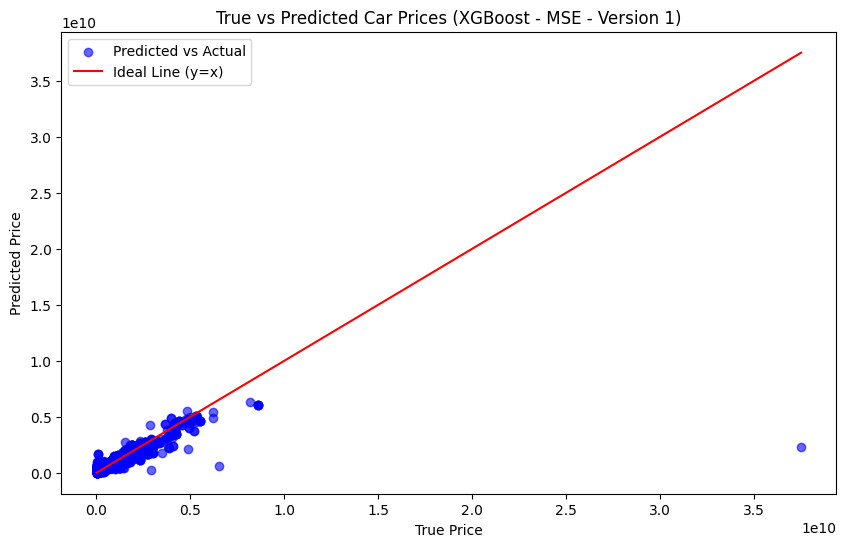

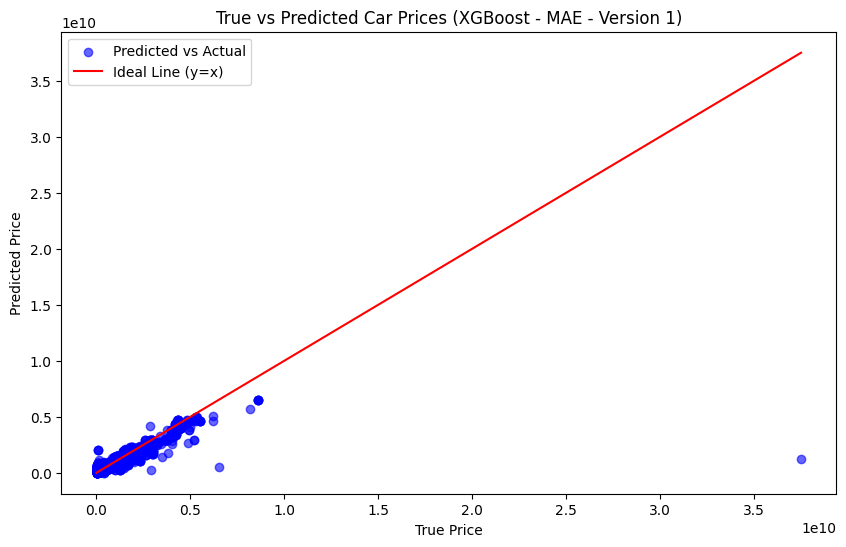

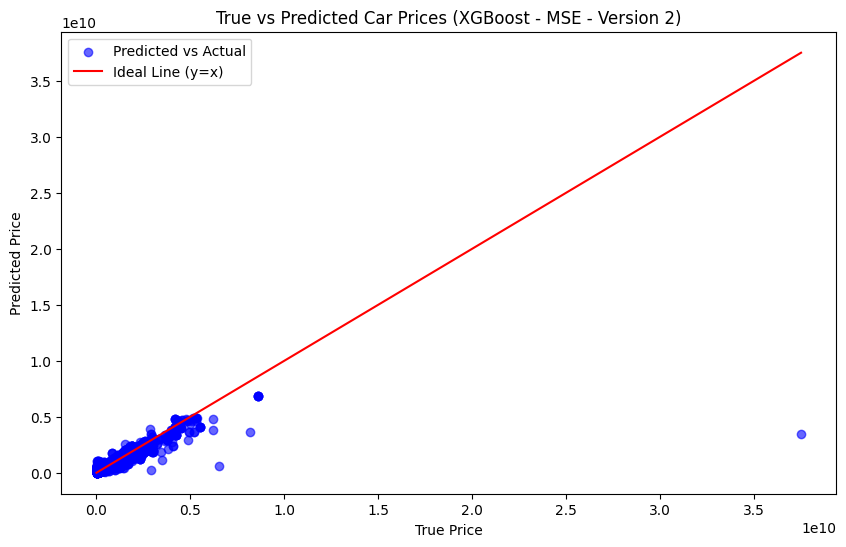

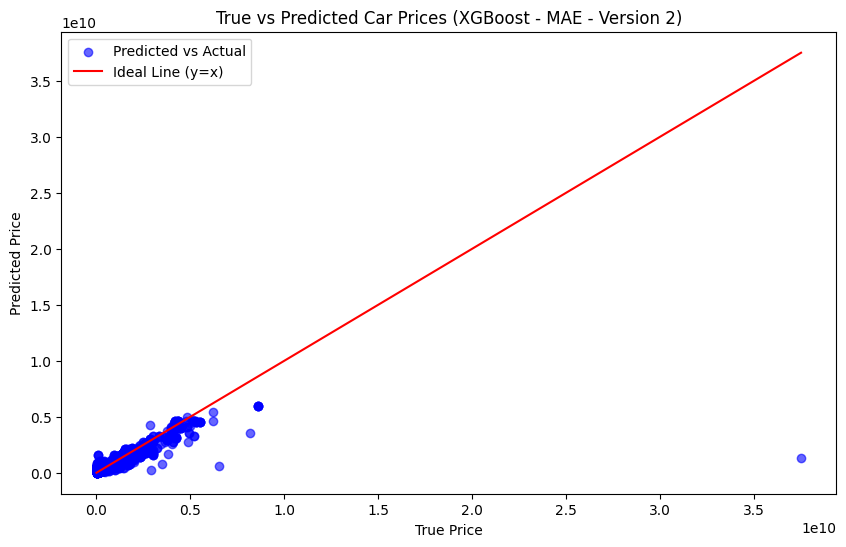

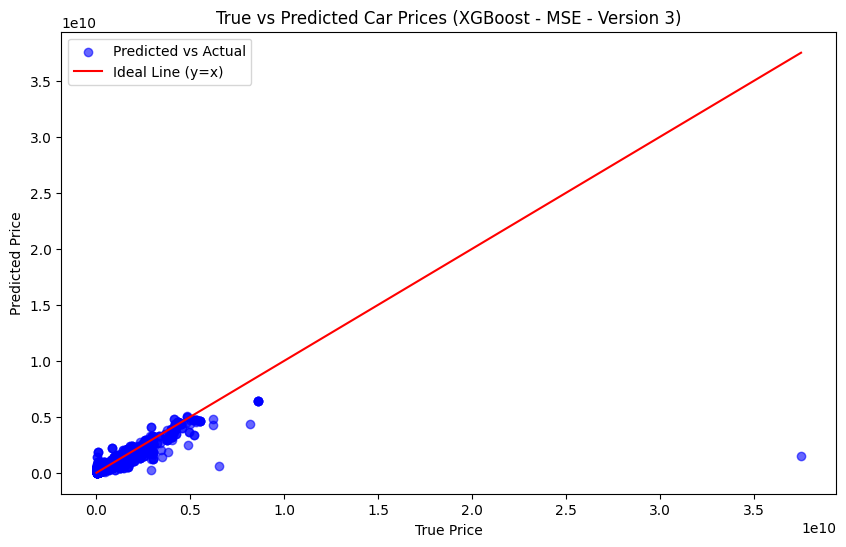

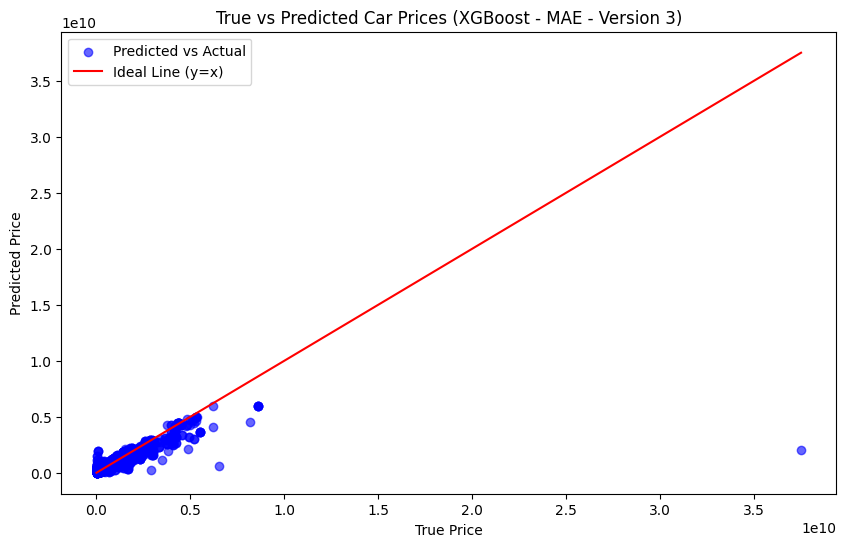

In [56]:
import matplotlib.pyplot as plt

# Assuming y_test_price, y_pred_xgb_mse_price1, y_pred_xgb_mae_price1, etc., are defined

def plot_true_vs_predicted(y_true, y_pred, title):
  plt.figure(figsize=(10, 6))
  plt.scatter(y_true, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
  plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', label="Ideal Line (y=x)")
  plt.title(title)
  plt.xlabel('True Price')
  plt.ylabel('Predicted Price')
  plt.legend()
  plt.show()


# Version 1
plot_true_vs_predicted(y_test_price, y_pred_xgb_mse_price1, 'True vs Predicted Car Prices (XGBoost - MSE - Version 1)')
plot_true_vs_predicted(y_test_price, y_pred_xgb_mae_price1, 'True vs Predicted Car Prices (XGBoost - MAE - Version 1)')

# Version 2
plot_true_vs_predicted(y_test_price, y_pred_xgb_mse_price2, 'True vs Predicted Car Prices (XGBoost - MSE - Version 2)')
plot_true_vs_predicted(y_test_price, y_pred_xgb_mae_price2, 'True vs Predicted Car Prices (XGBoost - MAE - Version 2)')

# Version 3
plot_true_vs_predicted(y_test_price, y_pred_xgb_mse_price3, 'True vs Predicted Car Prices (XGBoost - MSE - Version 3)')
plot_true_vs_predicted(y_test_price, y_pred_xgb_mae_price3, 'True vs Predicted Car Prices (XGBoost - MAE - Version 3)')

# Test cases

In [57]:

def transform_data(transformer ,input_data: pd.DataFrame):
  categorical_features = ['brand', 'model', 'origin', 'type', 'gearbox', 'fuel', 'color']
  numerical_features = ['seats', 'mileage_v2', 'car_age']
  current_year = 2024

  example_df_copy['car_age'] = current_year - example_df_copy['manufacture_date']
  transformed_data = transformer.transform(input_data)

  one_hot_columns = transformer.transformers_[1][1].get_feature_names_out(categorical_features)
  all_columns = numerical_features + list(one_hot_columns)

  transformed_data = transformed_data.toarray()
  transformed_data = pd.DataFrame(transformed_data, columns=all_columns)
  return transformed_data
def predict_price(model ,features: dict, preprocessor) -> float:
  # print(features)
  # input_data = pd.DataFrame([features])
  # print(features)

  transformed_data = transform_data(input_data=features, transformer=preprocessor)


  # Predict the log price
  log_price_pred = model.predict(transformed_data)


  # Reverse the log1p transformation to get the original price
  price_pred = np.expm1(log_price_pred)

  return price_pred

def format_numbers(numbers):
  """Formats numbers with commas as thousand separators."""
  return [f"{num:,.0f}" for num in numbers]


In [58]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBRegressor

# Load all preprocessors and models
preprocessors = {
    1: joblib.load('./models/preprocessor1.pkl'),
    2: joblib.load('./models/preprocessor2.pkl'),
    3: joblib.load('./models/preprocessor3.pkl')
}
xgb_mse_models = {
    1: joblib.load('./models/xgb_mse_model1.pkl'),
    2: joblib.load('./models/xgb_mse_model2.pkl'),
    3: joblib.load('./models/xgb_mse_model3.pkl')
}
xgb_mae_models = {
    1: joblib.load('./models/xgb_mae_model1.pkl'),
    2: joblib.load('./models/xgb_mae_model2.pkl'),
    3: joblib.load('./models/xgb_mae_model3.pkl')
}

In [59]:
example_features = {
        "manufacture_date": 2017,
        "brand": "Kia",
        "model": "Sedona",
        "origin": "Việt Nam",
        "type": "Minivan (MPV)",
        "seats": 7.0,
        "gearbox": "AT",
        "fuel": "oil",
        "color": "white",
        "mileage_v2": 140000,
        "condition": "used"
    }
example_df = pd.DataFrame([example_features])
example_df

,manufacture_date,brand,model,origin,type,seats,gearbox,fuel,color,mileage_v2,condition
0,2017,Kia,Sedona,Việt Nam,Minivan (MPV),7.0,AT,oil,white,140000,used


## Impact of manufacture date on price

In [60]:
# Create a copy of the example DataFrame
example_df_copy = example_df.copy()

# Generate 4 more rows with increasing manufacture_date
for i in range(1, 5):
    new_row = example_df_copy.iloc[0].copy()
    new_row['manufacture_date'] = example_df_copy['manufacture_date'].iloc[0] + i
    example_df_copy = pd.concat([example_df_copy, pd.DataFrame([new_row])], ignore_index=True)

In [61]:
for version in range(1, 4):
    price_xgb_mse_model = predict_price(features=example_df_copy, model=xgb_mse_models[version], preprocessor=preprocessors[version])
    price_xgb_mae_model = predict_price(features=example_df_copy, model=xgb_mae_models[version], preprocessor=preprocessors[version])

    price_xgb_mse_model = format_numbers(price_xgb_mse_model)
    price_xgb_mae_model = format_numbers(price_xgb_mae_model)

    print(f"Version {version}:")
    print(f"  XGB MSE Model Prediction:")
    print(price_xgb_mse_model)
    print(f"  XGB MAE Model Prediction:")
    print(price_xgb_mae_model)

Version 1:
  XGB MSE Model Prediction:
['715,736,448', '764,236,352', '826,204,160', '925,719,552', '859,982,016']
  XGB MAE Model Prediction:
['705,239,680', '759,597,632', '836,174,400', '911,837,056', '991,312,576']
Version 2:
  XGB MSE Model Prediction:
['734,241,536', '768,953,280', '859,729,408', '869,036,160', '961,805,056']
  XGB MAE Model Prediction:
['730,075,840', '754,093,312', '851,385,856', '864,879,040', '984,234,368']
Version 3:
  XGB MSE Model Prediction:
['760,673,408', '756,027,456', '823,986,752', '918,174,016', '867,274,304']
  XGB MAE Model Prediction:
['751,144,832', '745,472,768', '795,458,048', '846,106,816', '920,564,096']


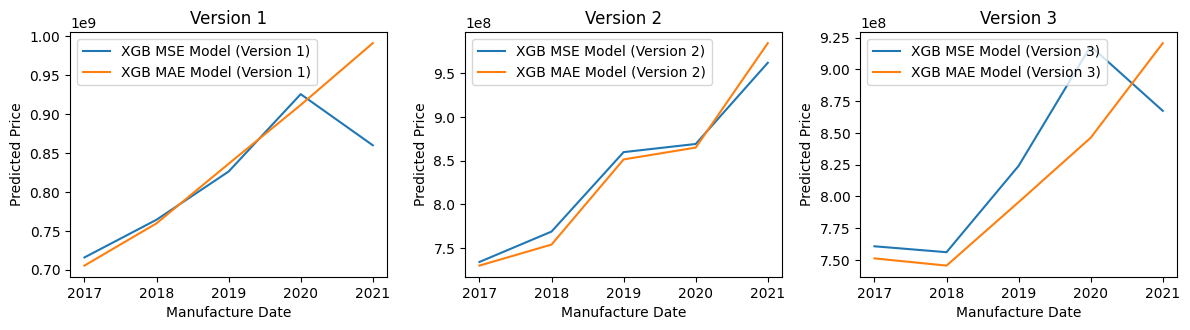

In [62]:


import matplotlib.pyplot as plt

# Assuming example_df_copy contains the manufacture dates and you've already made predictions
# as shown in your provided code

plt.figure(figsize=(12, 6))  # Adjust figure size for better layout

for version in range(1, 4):
    price_xgb_mse_model = predict_price(features=example_df_copy, model=xgb_mse_models[version], preprocessor=preprocessors[version])
    price_xgb_mae_model = predict_price(features=example_df_copy, model=xgb_mae_models[version], preprocessor=preprocessors[version])

    plt.subplot(2, 3, version) # 2 rows, 3 columns, plot in position version
    plt.plot(example_df_copy['manufacture_date'], price_xgb_mse_model, label=f"XGB MSE Model (Version {version})")
    plt.plot(example_df_copy['manufacture_date'], price_xgb_mae_model, label=f"XGB MAE Model (Version {version})")
    plt.xlabel('Manufacture Date')
    plt.ylabel('Predicted Price')
    plt.title(f'Version {version}')
    plt.legend()
    plt.tight_layout() # Adjust spacing between subplots

plt.show()

## Impact of mileage on price

Version 1:
  XGB MSE Model Prediction:
['715,736,448', '715,736,448', '704,384,640', '704,384,640', '704,384,640']
  XGB MAE Model Prediction:
['705,239,680', '705,239,680', '705,239,680', '705,239,680', '705,239,680']
Version 2:
  XGB MSE Model Prediction:
['734,241,536', '734,241,536', '732,089,408', '732,089,408', '732,089,408']
  XGB MAE Model Prediction:
['730,075,840', '730,075,840', '717,236,992', '717,236,992', '717,236,992']
Version 3:
  XGB MSE Model Prediction:
['760,673,408', '760,673,408', '760,673,408', '760,673,408', '760,673,408']
  XGB MAE Model Prediction:
['751,144,832', '751,144,832', '747,975,232', '747,975,232', '747,975,232']


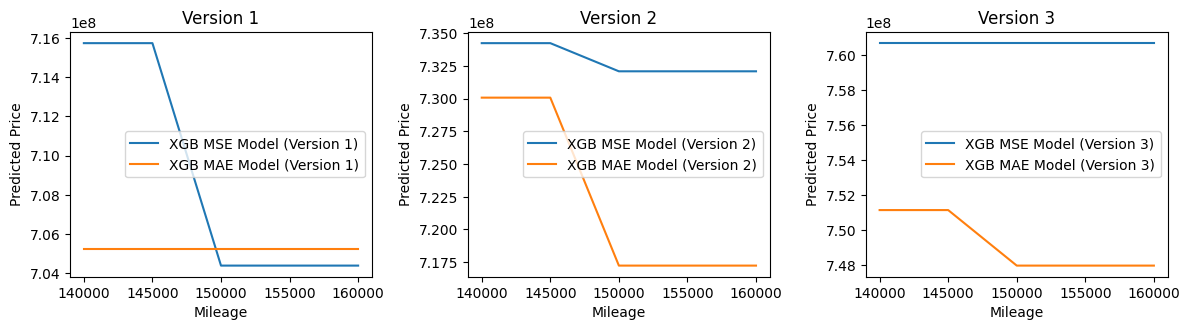

In [63]:


# Create a copy of the example DataFrame
example_df_copy = example_df.copy()

# Generate 4 more rows with increasing mileage
for i in range(1, 5):
    new_row = example_df_copy.iloc[0].copy()
    new_row['mileage_v2'] = example_df_copy['mileage_v2'].iloc[0] + i * 5000 # Increase mileage by 10000 each time
    example_df_copy = pd.concat([example_df_copy, pd.DataFrame([new_row])], ignore_index=True)

for version in range(1, 4):
    price_xgb_mse_model = predict_price(features=example_df_copy, model=xgb_mse_models[version], preprocessor=preprocessors[version])
    price_xgb_mae_model = predict_price(features=example_df_copy, model=xgb_mae_models[version], preprocessor=preprocessors[version])

    price_xgb_mse_model = format_numbers(price_xgb_mse_model)
    price_xgb_mae_model = format_numbers(price_xgb_mae_model)

    print(f"Version {version}:")
    print(f"  XGB MSE Model Prediction:")
    print(price_xgb_mse_model)
    print(f"  XGB MAE Model Prediction:")
    print(price_xgb_mae_model)

plt.figure(figsize=(12, 6))  # Adjust figure size for better layout

for version in range(1, 4):
    price_xgb_mse_model = predict_price(features=example_df_copy, model=xgb_mse_models[version], preprocessor=preprocessors[version])
    price_xgb_mae_model = predict_price(features=example_df_copy, model=xgb_mae_models[version], preprocessor=preprocessors[version])

    plt.subplot(2, 3, version) # 2 rows, 3 columns, plot in position version
    plt.plot(example_df_copy['mileage_v2'], price_xgb_mse_model, label=f"XGB MSE Model (Version {version})")
    plt.plot(example_df_copy['mileage_v2'], price_xgb_mae_model, label=f"XGB MAE Model (Version {version})")
    plt.xlabel('Mileage')
    plt.ylabel('Predicted Price')
    plt.title(f'Version {version}')
    plt.legend()
    plt.tight_layout() # Adjust spacing between subplots

plt.show()

## Impact of fuel on price

Version 1:
  XGB MSE Model Prediction:
['715,736,448', '640,966,784', '724,238,208', '724,238,208']
  XGB MAE Model Prediction:
['705,239,680', '603,198,144', '706,906,880', '706,906,880']
Version 2:
  XGB MSE Model Prediction:
['734,241,536', '608,677,440', '772,559,424', '772,559,424']
  XGB MAE Model Prediction:
['730,075,840', '622,486,976', '783,645,568', '783,645,568']
Version 3:
  XGB MSE Model Prediction:
['760,673,408', '660,919,808', '691,351,168', '734,198,144']
  XGB MAE Model Prediction:
['751,144,832', '621,856,832', '764,965,504', '764,965,504']


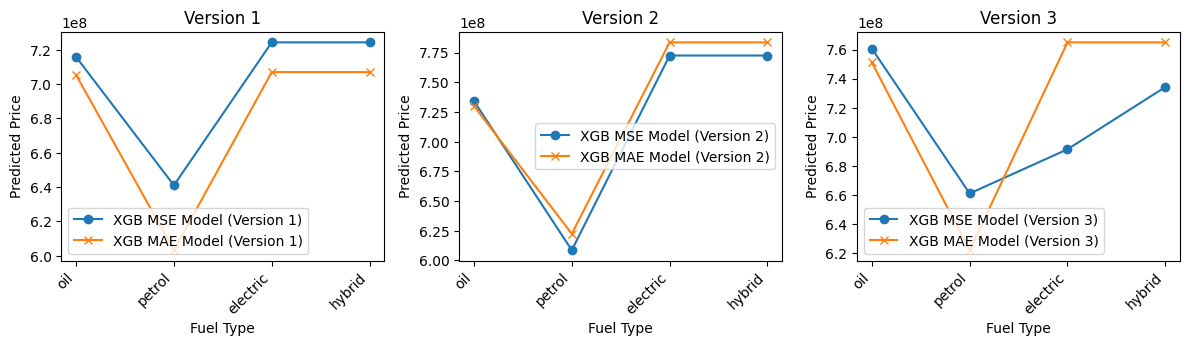

In [64]:


# Create a copy of the example DataFrame
example_df_copy = example_df.copy()

# Define a list of fuel types to cycle through
fuel_types = ['oil', 'petrol', 'electric', 'hybrid']

# Generate 3 more rows with different fuel types
for i in range(1, 4):
    new_row = example_df_copy.iloc[0].copy()
    new_row['fuel'] = fuel_types[i % len(fuel_types)]  # Cycle through fuel types
    example_df_copy = pd.concat([example_df_copy, pd.DataFrame([new_row])], ignore_index=True)
for version in range(1, 4):
    price_xgb_mse_model = predict_price(features=example_df_copy, model=xgb_mse_models[version], preprocessor=preprocessors[version])
    price_xgb_mae_model = predict_price(features=example_df_copy, model=xgb_mae_models[version], preprocessor=preprocessors[version])
    price_xgb_mse_model = format_numbers(price_xgb_mse_model)
    price_xgb_mae_model = format_numbers(price_xgb_mae_model)
    print(f"Version {version}:")
    print(f"  XGB MSE Model Prediction:")
    print(price_xgb_mse_model)
    print(f"  XGB MAE Model Prediction:")
    print(price_xgb_mae_model)

plt.figure(figsize=(12, 6))  # Adjust figure size for better layout

for version in range(1, 4):
    price_xgb_mse_model = predict_price(features=example_df_copy, model=xgb_mse_models[version], preprocessor=preprocessors[version])
    price_xgb_mae_model = predict_price(features=example_df_copy, model=xgb_mae_models[version], preprocessor=preprocessors[version])

    plt.subplot(2, 3, version)  # 2 rows, 3 columns, plot in position version
    plt.plot(example_df_copy['fuel'], price_xgb_mse_model, label=f"XGB MSE Model (Version {version})", marker='o')
    plt.plot(example_df_copy['fuel'], price_xgb_mae_model, label=f"XGB MAE Model (Version {version})", marker='x')
    plt.xlabel('Fuel Type')
    plt.ylabel('Predicted Price')
    plt.title(f'Version {version}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend()
    plt.tight_layout()  # Adjust spacing between subplots

plt.show()